# Proyecto de Machine Learning: Predicci√≥n y Clasificaci√≥n de Problemas del Sue√±o en Personas

Este proyecto aplica t√©cnicas de **Machine Learning** para analizar datos de salud y estilo de vida con el objetivo de:

1. **Predecir si una persona tiene problemas en la calidad de su sue√±o** (sue√±o saludable vs. sue√±o no saludable).
2. **Clasificar el tipo de trastorno del sue√±o**, en caso de que se detecte un problema con el sue√±o:
   - **Insomnio**
   - **Apnea del sue√±o**

### Modelos utilizados:
- **Random Forest**: Para detectar si tienes o no problema en la calidad del sue√±o.
- **XGBoost Classifier**: Para clasificar que tipo de trastorno padeces cuando se detecta probelmas con el sue√±o.

---

### Funcionalidades interactivas en Streamlit

La aplicaci√≥n desarrollada con **Streamlit** ofrece al usuario una experiencia:

- **Predicci√≥n personalizada**: El usuario introduce sus datos y obtiene un diagn√≥stico autom√°tico sobre su calidad del sue√±o.
- **Recomendaciones geolocalizadas**: La aplicaci√≥n permite consultar cl√≠nicas o centros especializados cercanos a su ciudad para realizar un estudio del sue√±o o trabajar en la mejora del sue√±o.
- **Env√≠o autom√°tico por correo**: La informaci√≥n dada sobre una clinica o lo que el usuario pregunte, puede ser enviada por correo electr√≥nico al usuario.

---

Este proyecto no solo busca ofrecer una herramienta de predicci√≥n, sino tambi√©n una ayuda pr√°ctica para el usuario, orient√°ndolo hacia mejorar su salud del sue√±o.

## Objetivos del Proyecto

El objetivo principal de este proyecto es desarrollar un sistema automatizado que pueda analizar informaci√≥n personal ofrecida de un usuario para:

-  **Detectar posibles trastornos del sue√±o**.
-  **Clasificar el tipo de trastorno cuando sea necesario**.
-  **Sugerir acciones o recursos √∫tiles**, como centros especializados cercanos.
-  **Sea preciso**.
-  **Funcione con los datos que las personas pueden proveer f√°cilmente**

Este sistema puede ser √∫til como herramienta preventiva y de concienciaci√≥n sobre la importancia del sue√±o en la salud general.

# Origen dataset
El dataset es descargado de la plataforma **kaggle.com**

## Primero necesitamos importar todas las herramientas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath('./src/utils'))

from toolbox_ML import *
from bootcampviztools import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from collections import Counter
from scipy.stats import mannwhitneyu

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

import joblib

## Cargamos el dataset y hacemos una descripci√≥n de los datos

In [2]:
df = pd.read_csv('./src/data/Sleep_Health_and_Lifestyle.csv', index_col = [0])

- **Person ID**: Indice por filas
- **Gender**: Genero de las personas 
- **Age**: Edad de las personas en a√±os
- **Occupation**: A que se dedican las personas
- **Sleep Duration**: Cantidad de horas que duerme esa persona
- **Quality of Sleep**: Ratio del 1 al 10 de la calidad del sue√±o, seg√∫n el criterio de la persona
- **Physical Activity Level**: Tiempo en minutos de actividad fisica al d√≠a
- **Stress Level**: Ratio del 1 al 10 del estr√©s, seg√∫n el criterio de la persona
- **BMI Category**: Ser√≠a el √≠ndice de masa corporal pero en cuatro niveles (Normal, sobrepeso...)
- **Blood Pressure**: La medida de la presi√≥n arterial de la persona, indicada como presi√≥n sist√≥lica sobre presi√≥n diast√≥lica.
- **Heart Rate**: Latidos por minuto de la persona en resposo
- **Daily Steps**: Pasos diarios de la persona
- **Sleep Disorder**: (target) indica si tiene un problema con el sue√±o o no (NaN)

## Mostramos informaci√≥n b√°sica del dataset

In [3]:
df.sample(5)

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                              
263        Female   45     Teacher             6.6                 7   
136          Male   38      Lawyer             7.3                 8   
301        Female   51    Engineer             8.5                 9   
350        Female   57       Nurse             8.1                 9   
309        Female   52  Accountant             6.6                 7   

           Physical Activity Level  Stress Level BMI Category Blood Pressure  \
Person ID                                                                      
263                             45             4   Overweight         135/90   
136                             60             5       Normal         130/85   
301                             30             3       Normal         125/80   
350                             75             3   Overweight         140/95   
309                             45             7   Overweight         130/85   

           Heart Rate  Daily Steps Sleep Disorder  
Person ID                                          
263                65         6000            NaN  
136                68         8000            NaN  
301                65         5000            NaN  
350                68         7000    Sleep Apnea  
309                72         6000       Insomnia

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


## Los valores que faltan en 'Sleep Disorder' son los que indican que no sufre ning√∫n trastorno del sue√±o

In [5]:
describe_df(df)

Gender    Age Occupation Sleep Duration Quality of Sleep  \
DATA_TYPE      object  int64     object        float64            int64   
MISSINGS(%)       0.0    0.0        0.0            0.0              0.0   
UNIQUE_VALUES       2     31         11             27                6   
CARDIN(%)        0.53   8.29       2.94           7.22              1.6   

              Physical Activity Level Stress Level BMI Category  \
DATA_TYPE                       int64        int64       object   
MISSINGS(%)                       0.0          0.0          0.0   
UNIQUE_VALUES                      16            6            4   
CARDIN(%)                        4.28          1.6         1.07   

              Blood Pressure Heart Rate Daily Steps Sleep Disorder  
DATA_TYPE             object      int64       int64         object  
MISSINGS(%)              0.0        0.0         0.0          58.56  
UNIQUE_VALUES             25         19          20              3  
CARDIN(%)               6.68       5.08        5.35            0.8

In [6]:
tipifica_variables(df, 10, 0.20)

variable      tipo_sugerido
0                    Gender            Binaria
1                       Age  Num√©rica discreta
2                Occupation  Num√©rica discreta
3            Sleep Duration  Num√©rica discreta
4          Quality of Sleep         Categ√≥rica
5   Physical Activity Level  Num√©rica discreta
6              Stress Level         Categ√≥rica
7              BMI Category         Categ√≥rica
8            Blood Pressure  Num√©rica discreta
9                Heart Rate  Num√©rica discreta
10              Daily Steps  Num√©rica discreta
11           Sleep Disorder         Categ√≥rica

In [7]:
df.describe().T

count         mean          std     min      25%  \
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    30.0    45.00   
Stress Level             374.0     5.385027     1.774526     3.0     4.00   
Heart Rate               374.0    70.165775     4.135676    65.0    68.00   
Daily Steps              374.0  6816.844920  1617.915679  3000.0  5600.00   

                            50%     75%      max  
Age                        43.0    50.0     59.0  
Sleep Duration              7.2     7.8      8.5  
Quality of Sleep            7.0     8.0      9.0  
Physical Activity Level    60.0    75.0     90.0  
Stress Level                5.0     7.0      8.0  
Heart Rate                 70.0    72.0     86.0  
Daily Steps              7000.0  8000.0  10000.0

In [8]:
df.Occupation.value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

## Tenemos que tener en cuenta que 'Manager' 1, quiz√°s nos da alg√∫n problema en el split, ya que 'Manager', estar√° en train o test, no en los dos

## Separamos las columnas que son categ√≥ricas

In [9]:
cat_features = ['Gender', 'Occupation', 'BMI Category']

# **Primera fase**

## Retocamos el target porque en la primera fase lo usaremos para detectar si tienes problema con el sue√±o o no

In [10]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('NaN')

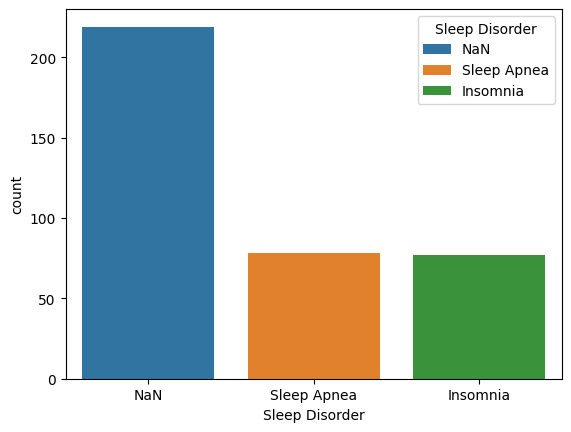

In [11]:
sns.countplot(df, x='Sleep Disorder', hue= 'Sleep Disorder', legend=True)
plt.show()

## Codificamos como 0 (NaN(buen sue√±o)), 1 (Sleep Apnea) + (Insomnia)

In [12]:
mapeo = {'NaN':0, 'Sleep Apnea':1, 'Insomnia':1}
df['Sleep Disorder'] = df['Sleep Disorder'].map(mapeo)

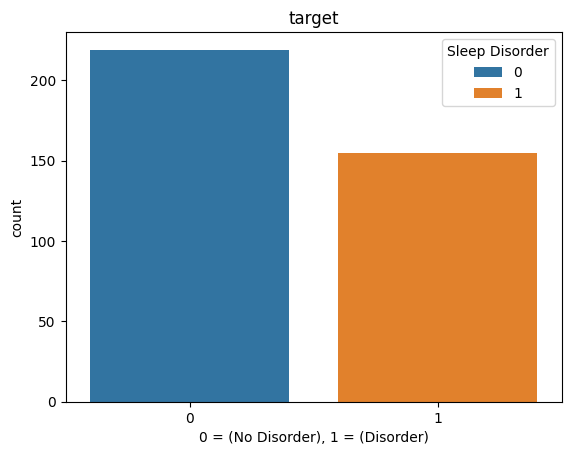

In [13]:
sns.countplot(df, x='Sleep Disorder', hue= 'Sleep Disorder', legend=True)
plt.xlabel('0 = (No Disorder), 1 = (Disorder)')
plt.title('target')
plt.show()

In [14]:
df['Sleep Disorder'].value_counts(True)

Sleep Disorder
0    0.585561
1    0.414439
Name: proportion, dtype: float64

## De esta forma tenemos un target binario, as√≠ podemos implementar diferentes m√©tricas depende del proceso, en este caso ser√° la m√©trica de **recall**, como lo m√°s importante es no dejar pasar a positivos, por esta raz√≥n se usa el scoring de recall, muy usada en la sanidad

## Ahora hacemos el split de los datos

In [15]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

In [16]:
print(train_set.shape)
print(test_set.shape)

(299, 12)
(75, 12)


In [17]:
train_set.reset_index(inplace=True)

## Vamos a hacer todas las transformaciones necesarias para dejar los datos listos para el modelo predictivo

In [18]:
train_set.drop(columns='Person ID', inplace=True) # esta columna no nos aporta valor
train_set.rename(columns = {'Sleep Disorder':'target'}, inplace=True) # cambio de nombre para un futuro mejor
# vamos a separar la columna de 'blood pressure' y vamos a calcular la presion del pulso
train_set[['systolic','diastolic']] = train_set['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
train_set.drop(columns='Blood Pressure', inplace=True)
train_set['systolic'] = train_set['systolic'].astype(int)
train_set['diastolic'] = train_set['diastolic'].astype(int)
# sacamos una nueva columna que es la de la presi√≥n del pulso
train_set['Pulse Pressure'] = train_set['systolic'] - train_set['diastolic']

In [19]:
train_set.sample(5)

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
145    Male   44  Salesperson             6.4                 6   
124    Male   39       Lawyer             7.2                 8   
214    Male   31       Doctor             7.7                 7   
234  Female   43      Teacher             6.7                 7   
153  Female   49        Nurse             6.2                 6   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
145                       45             7   Overweight          72   
124                       60             5       Normal          68   
214                       75             6       Normal          70   
234                       45             4   Overweight          65   
153                       90             8   Overweight          75   

     Daily Steps  target  systolic  diastolic  Pulse Pressure  
145         6000       1       130         85              45  
124         8000       0       130         85              45  
214         8000       0       120         80              40  
234         6000       1       135         90              45  
153        10000       1       140         95              45

## Sacamos las features que son num√©ricas y ver outliers

In [20]:
numericas_features = []
for x in train_set.columns:
    if x not in cat_features and x != 'target':
        numericas_features.append(x)

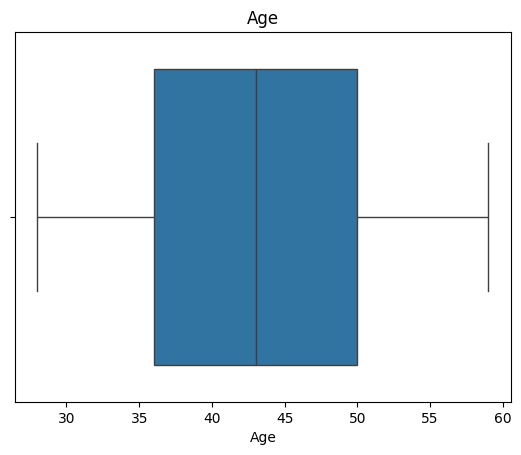

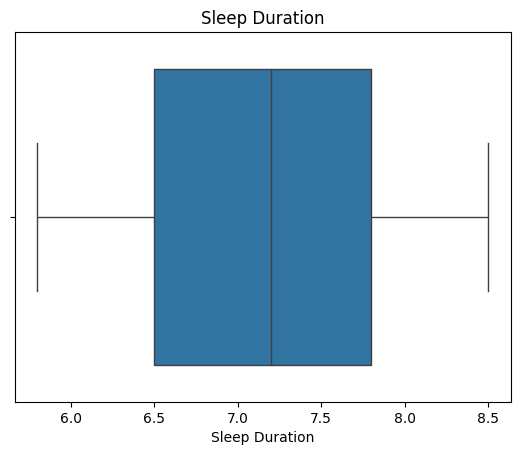

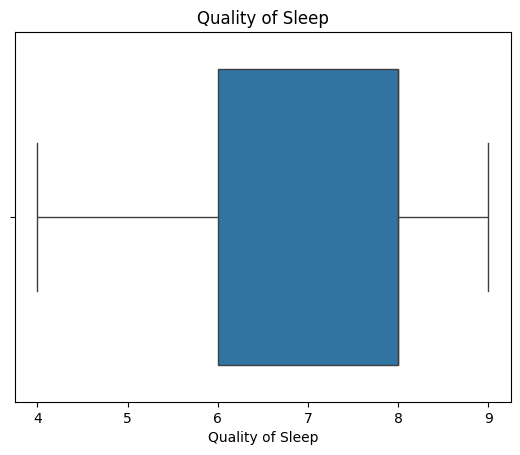

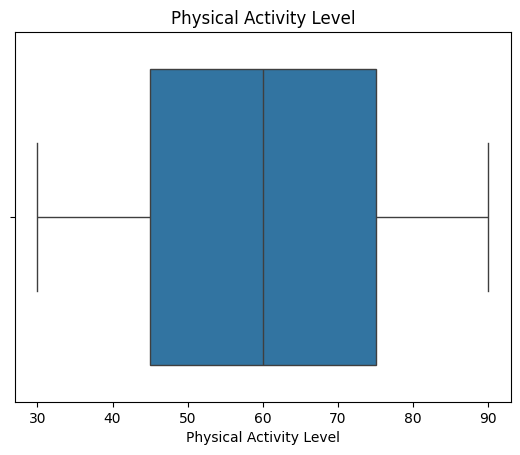

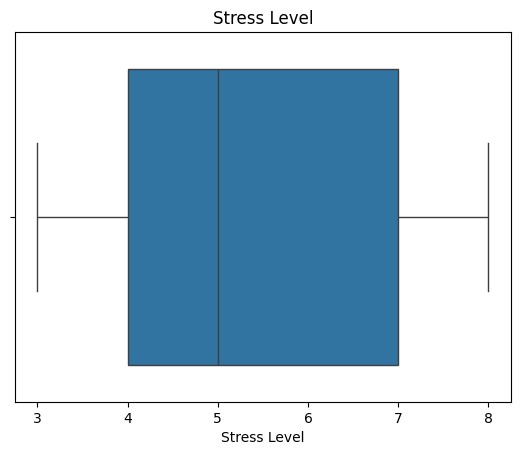

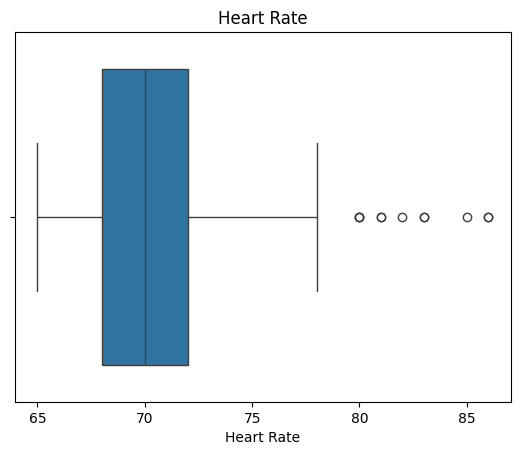

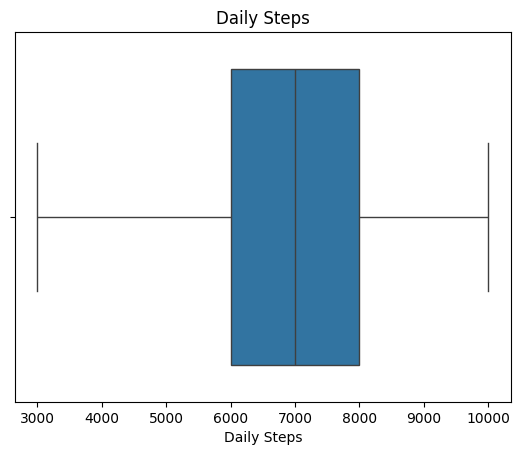

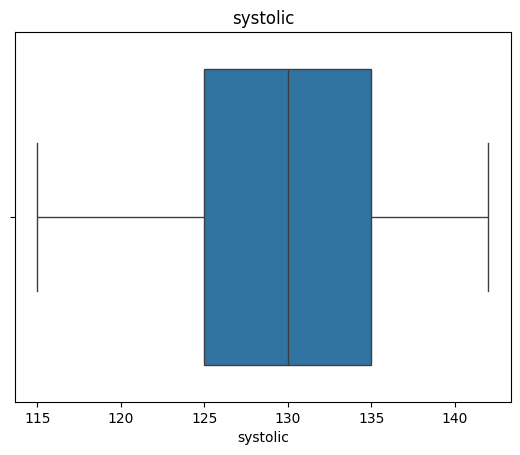

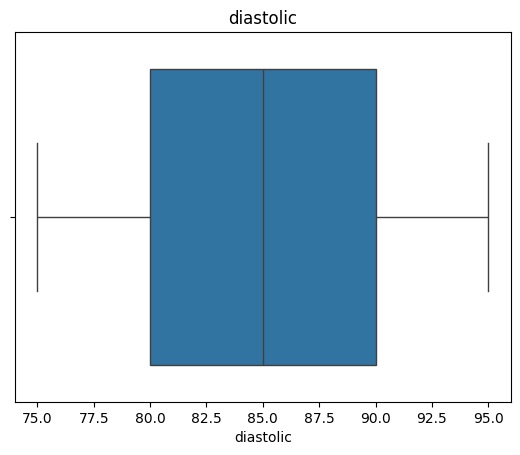

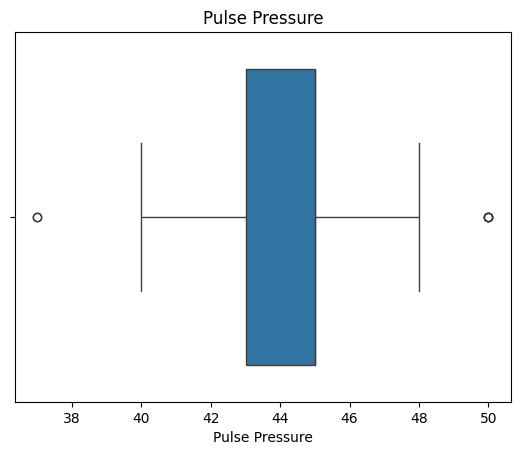

In [21]:
for x in numericas_features:
    plt.figure()
    sns.boxplot(x = train_set[x])
    plt.title(x)

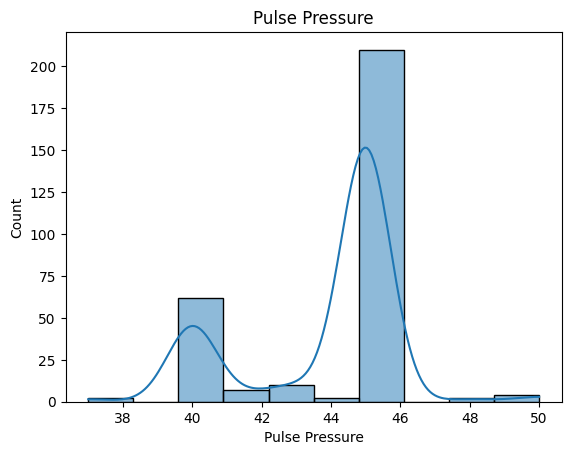

In [22]:
sns.histplot(train_set, x='Pulse Pressure', kde=True, bins=10)
plt.title('Pulse Pressure')
plt.show()

### Parecen haber outliers en la presi√≥n del pulso, pero no son outliers porque la presi√≥n del pulso est√° dentro de los normal

## El siguiente paso es ver las features comparadas con el target para ver su distribuci√≥n con forma de histogramas y gr√°ficos de barras

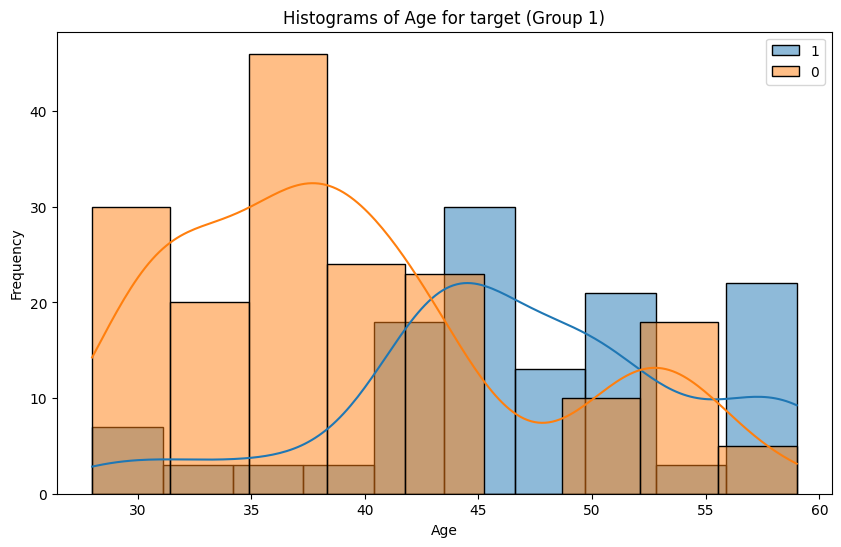

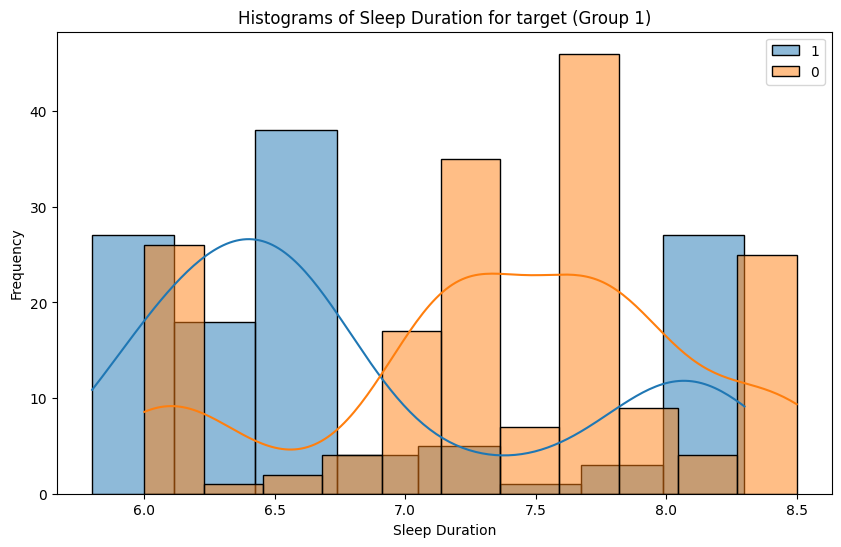

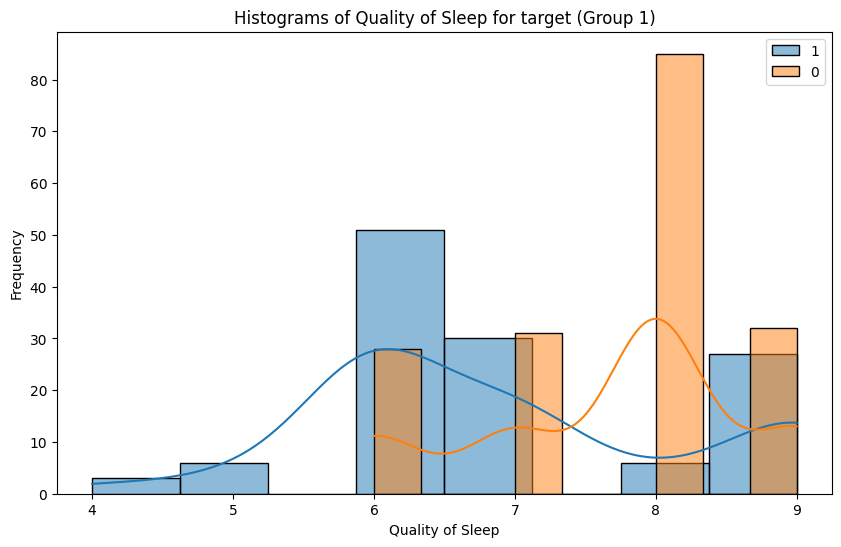

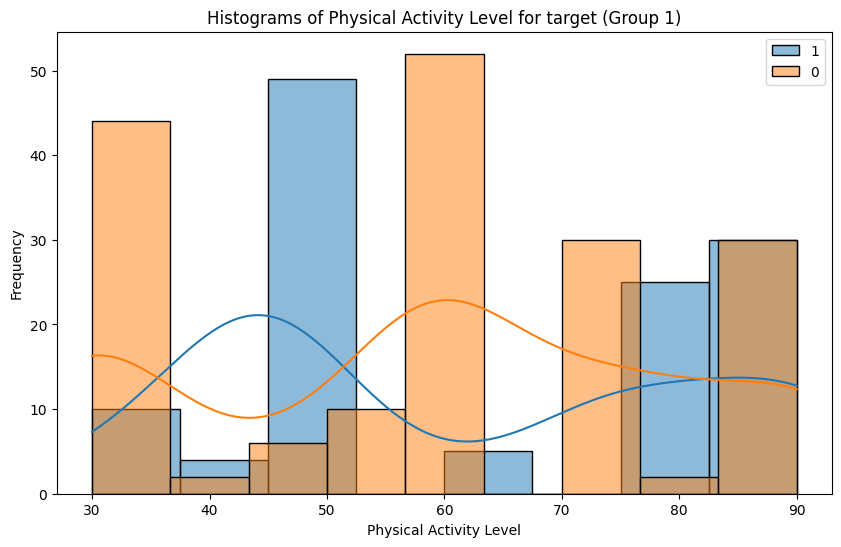

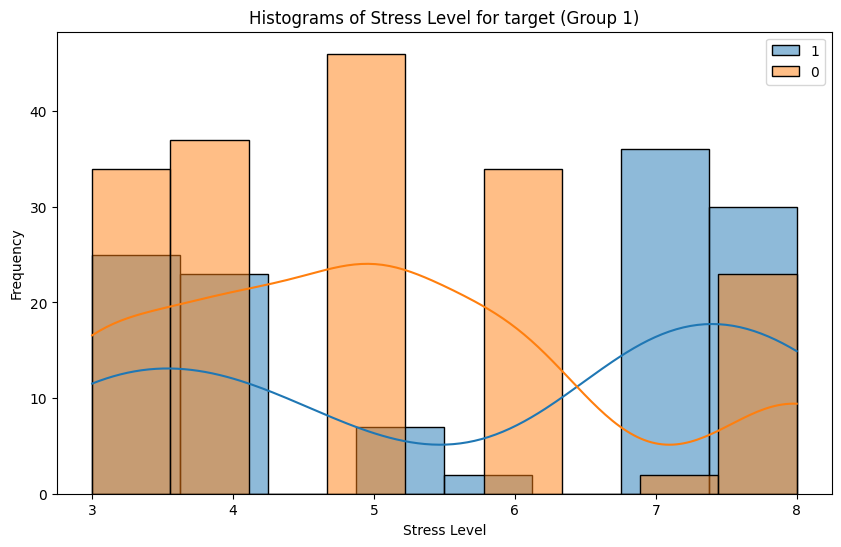

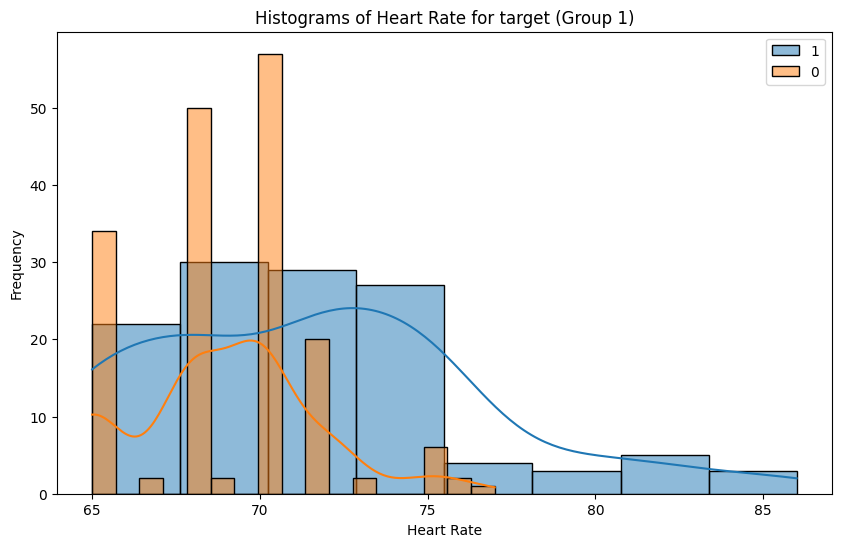

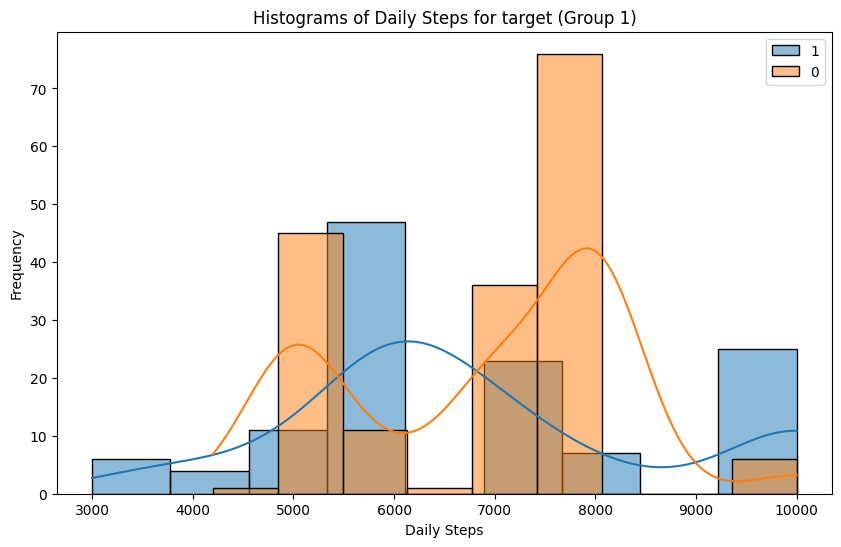

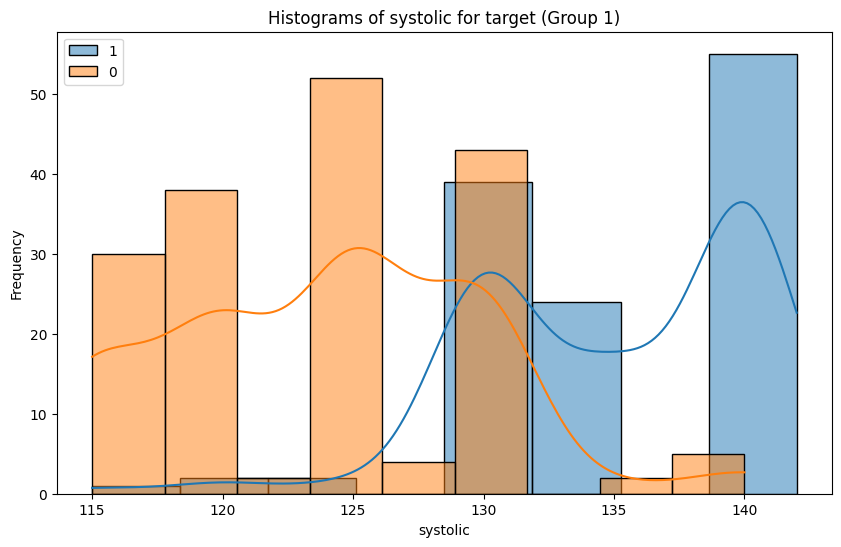

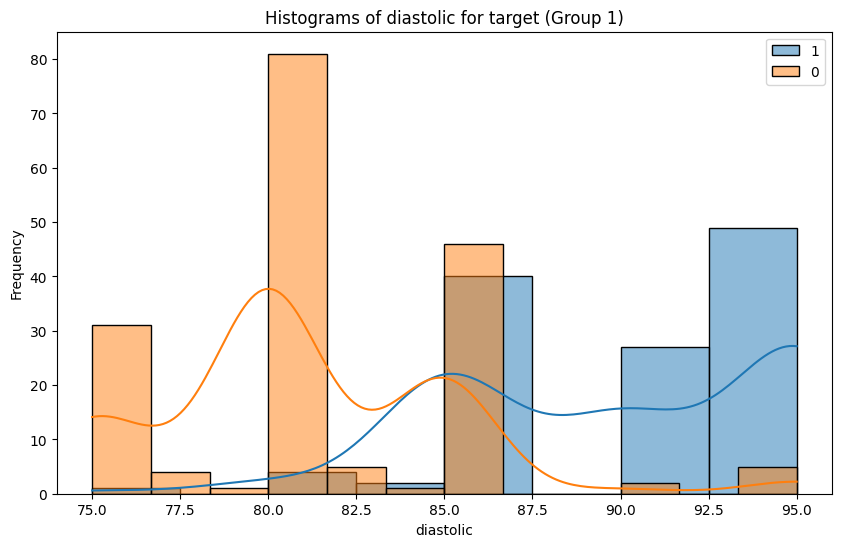

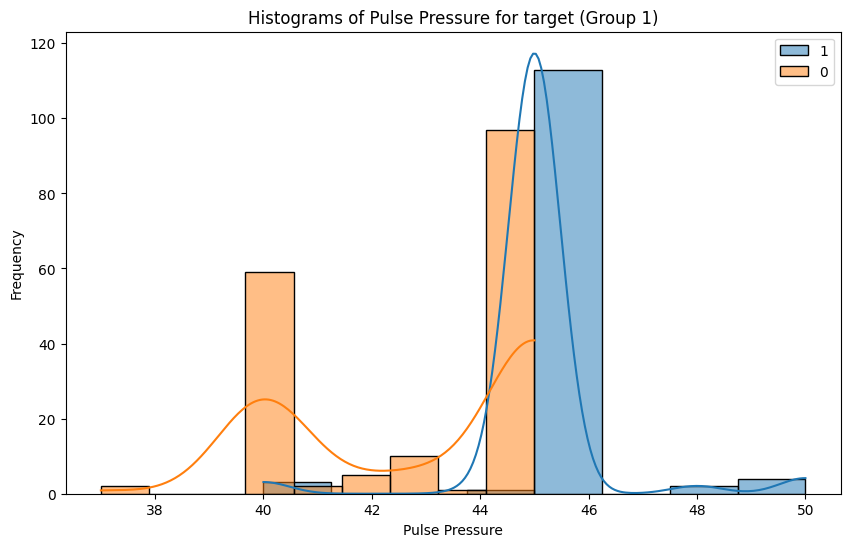

In [23]:
for x in numericas_features:
    plot_grouped_histograms(train_set, 'target', x, group_size=2)

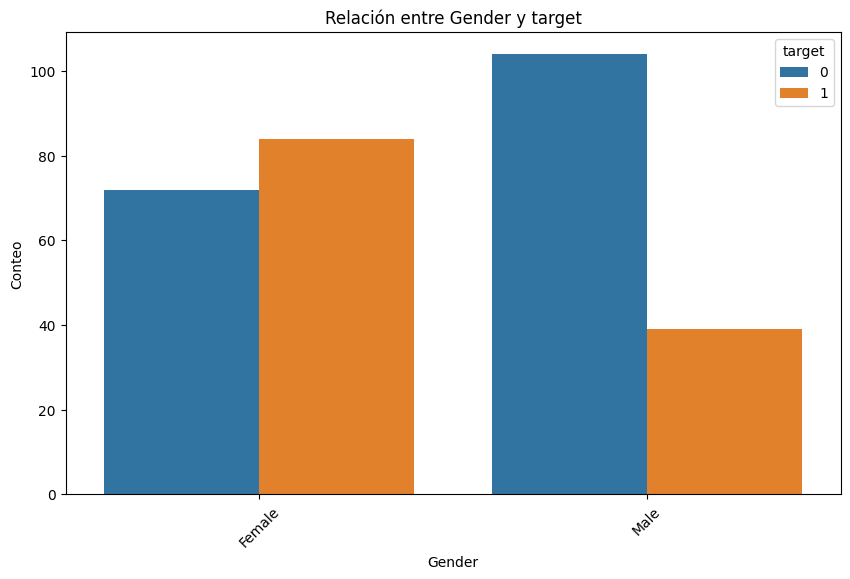

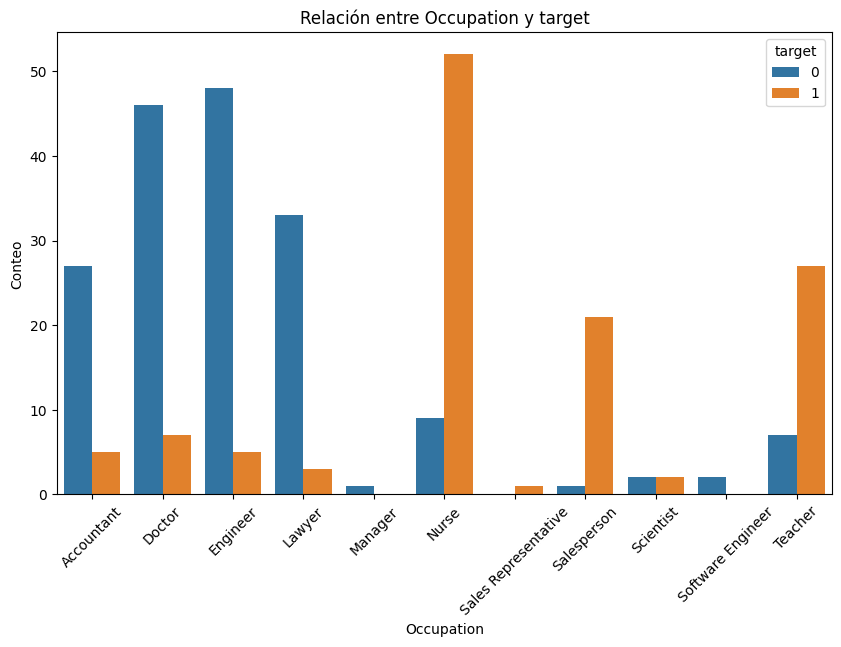

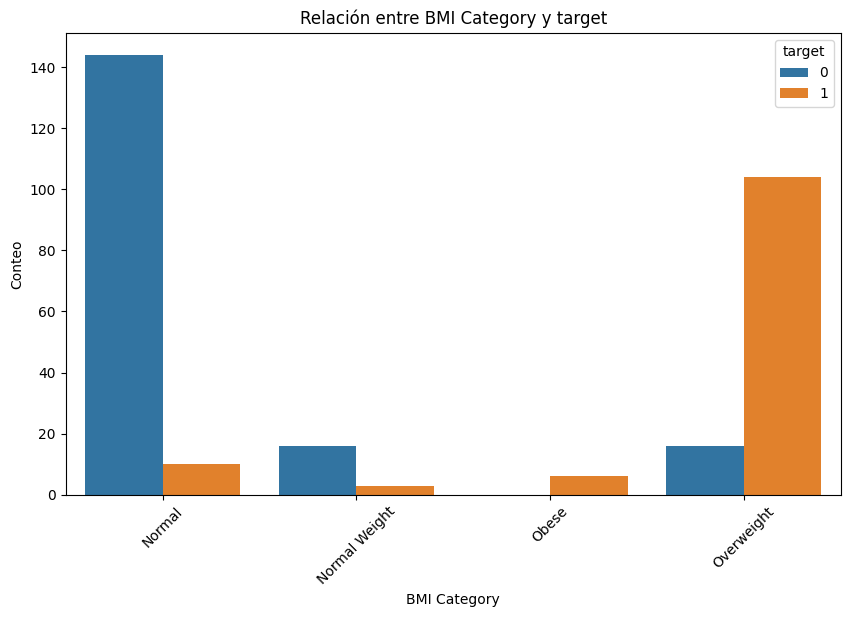

In [24]:
for x in cat_features:
    plot_categorical_relationship_fin(train_set, cat_col1=x, cat_col2='target', size_group=11)

## Se ve una buena relaci√≥n entre las features contra el target, hay una diferencia entre los que no tienen problema del sue√±o y los que tienen problemas en el sue√±o.

## Vamos a codificar esas features categ√≥ricas

In [25]:
train_set['BMI Category'].value_counts()

BMI Category
Normal           154
Overweight       120
Normal Weight     19
Obese              6
Name: count, dtype: int64

In [26]:
train_set['Gender_code'] = train_set['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
train_set['BMI Category'] = train_set['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
train_set['BMI Category_code'] = train_set['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)
dummies = pd.get_dummies(train_set['Occupation']).astype(int)
train_set = pd.concat([train_set, dummies], axis = 1)

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
train_set.head(5)

Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0    Male   43        Salesperson             6.5                 6   
1    Male   33             Doctor             6.0                 6   
2    Male   35  Software Engineer             7.5                 8   
3  Female   59              Nurse             8.2                 9   
4  Female   29              Nurse             6.5                 5   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       45             7   Overweight          72   
1                       30             8       Normal          72   
2                       60             5       Normal          70   
3                       75             3   Overweight          68   
4                       40             7       Normal          80   

   Daily Steps  target  systolic  diastolic  Pulse Pressure  Gender_code  \
0         6000       1       130         85              45            0   
1         5000       0       125         80              45            0   
2         8000       0       120         80              40            0   
3         7000       1       140         95              45            1   
4         4000       1       132         87              45            1   

   BMI Category_code  Accountant  Doctor  Engineer  Lawyer  Manager  Nurse  \
0                  1           0       0         0       0        0      0   
1                  0           0       1         0       0        0      0   
2                  0           0       0         0       0        0      0   
3                  1           0       0         0       0        0      1   
4                  0           0       0         0       0        0      1   

   Sales Representative  Salesperson  Scientist  Software Engineer  Teacher  
0                     0            1          0                  0        0  
1                     0            0          0                  0        0  
2                     0            0          0                  1        0  
3                     0            0          0                  0        0  
4                     0            0          0                  0        0

In [29]:
pd.reset_option('display.max_columns', None)

In [30]:
# le cambiamos le tipo para los modelos que aceptan categ√≥ricas de tipo category
train_set['Gender'] = train_set['Gender'].astype('category')
train_set['Occupation'] = train_set['Occupation'].astype('category')
train_set['BMI Category'] = train_set['BMI Category'].astype("category")

In [31]:
categoricas_category = ['Gender', 'Occupation', 'BMI Category']

In [32]:
categoricas_int = ['Gender_code', 'Accountant','Doctor','Engineer','Lawyer','Manager','Nurse','Sales Representative',
               'Salesperson','Scientist','Software Engineer','Teacher', 'BMI Category_code']

In [33]:
numericas = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level', 
             'Heart Rate','Daily Steps', 'systolic', 'diastolic','Pulse Pressure']

In [34]:
target = 'target'

## Vamos a ver la comparaci√≥n de las features con el target, otra forma de verlo con pairplot de seaborn

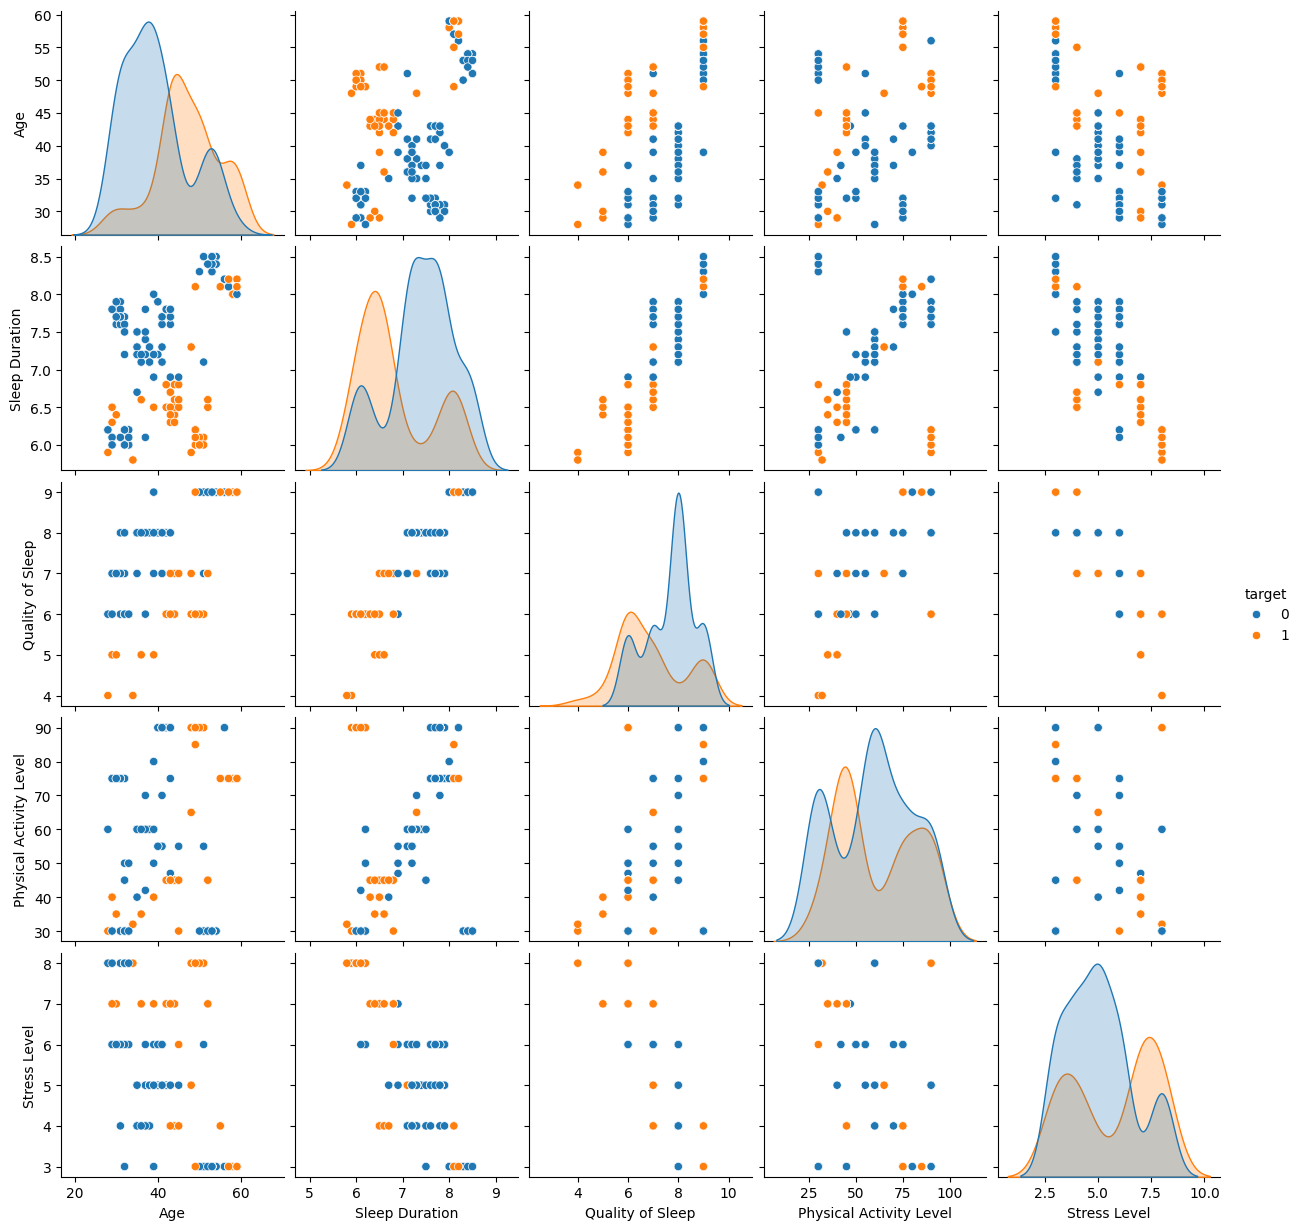

In [35]:
sns.pairplot(train_set[numericas[0:5] + [target]], hue = target);

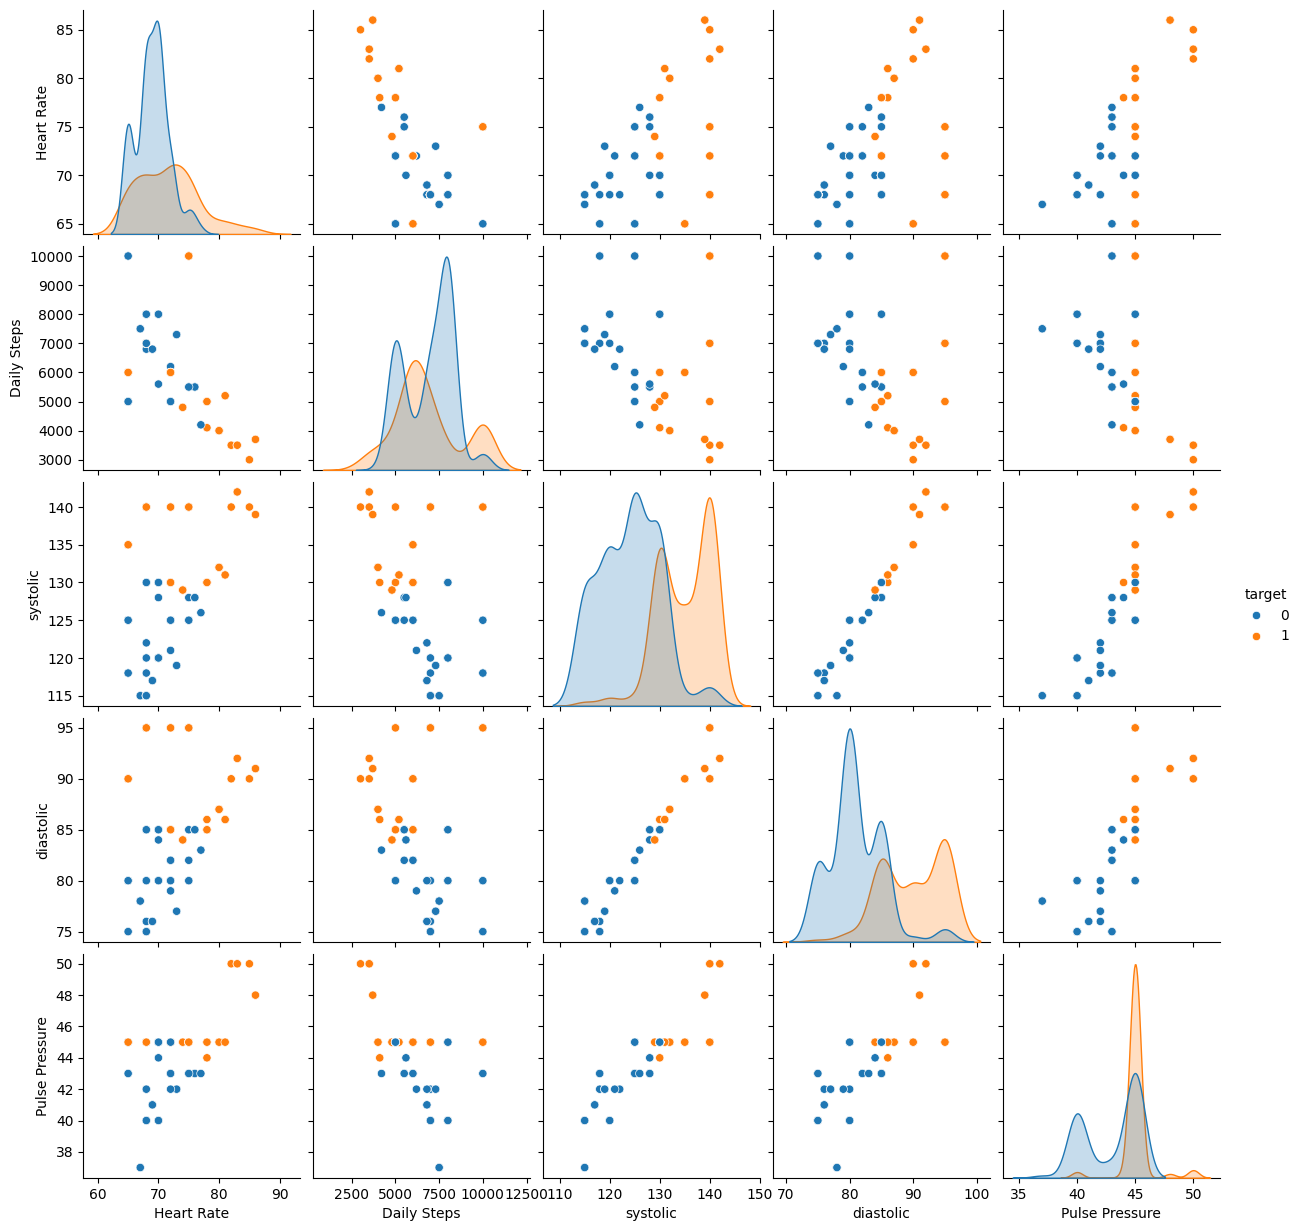

In [36]:
sns.pairplot(train_set[numericas[5:] + [target]], hue = target);

## Las features contra el target se diferencian bien, lo mismo que vimos en en an√°lisis bivariante anterior

## Vamos a sacar un heatmap de seaborn para ver las correlaciones de las features num√©ricas

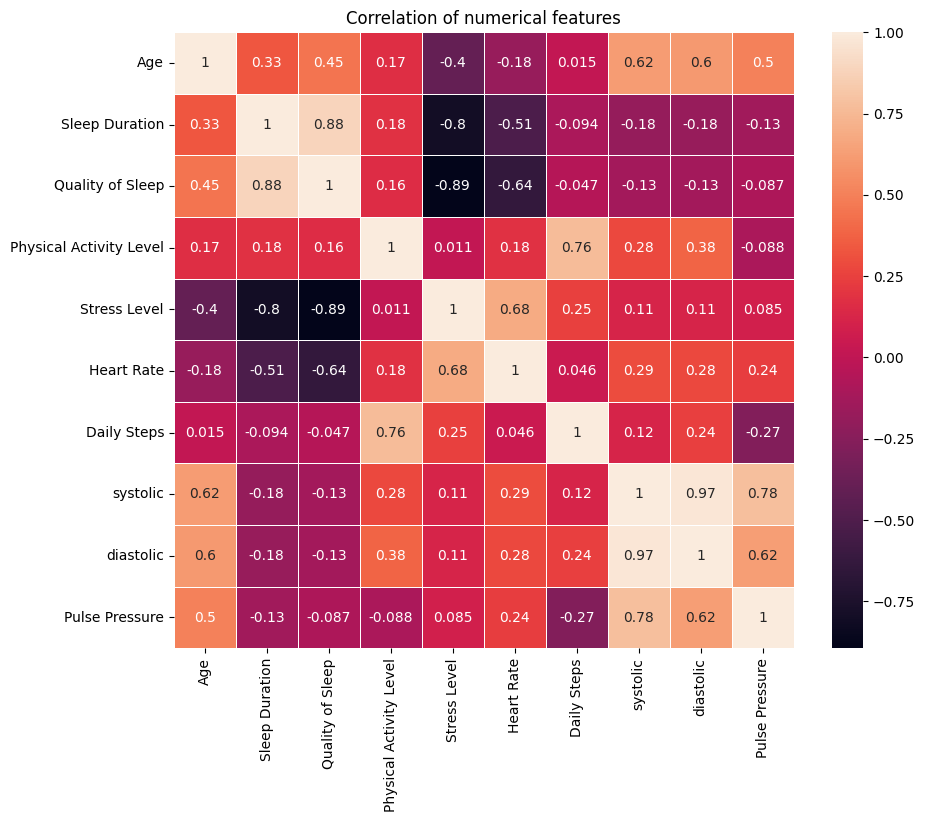

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(train_set[numericas].corr(), annot=True, linewidths=0.5)
plt.title('Correlation of numerical features');

- 'Sleep Duration' tiene fuerte correlaci√≥n con 'Quality of Sleep'
- 'Physical Activity Level' se ve que hay mucha correlaci√≥n con 'Daily Steps'
- 'Heart Rate' se ve importante correlaci√≥n con 'Stress Level'
- 'systolic' tiene fuerte correlaci√≥n con 'diastolic', en verdad es informaci√≥n que va junta
- 'Pulse Pressure' se ve correlaci√≥n con 'diastolic' y 'systolic', ciertamente ha salido de esas dos columnas
- Tambi√©n 'Sleep Duration' y 'Strees Level' se ve muy claro que a mayor 'Streest Level' menor 'Sleep Duration'

## Vamos a mirar los histogramas de las num√©ricas, para hacer an√°lisis univariante, as√≠ vemos la distribuci√≥n de los datos

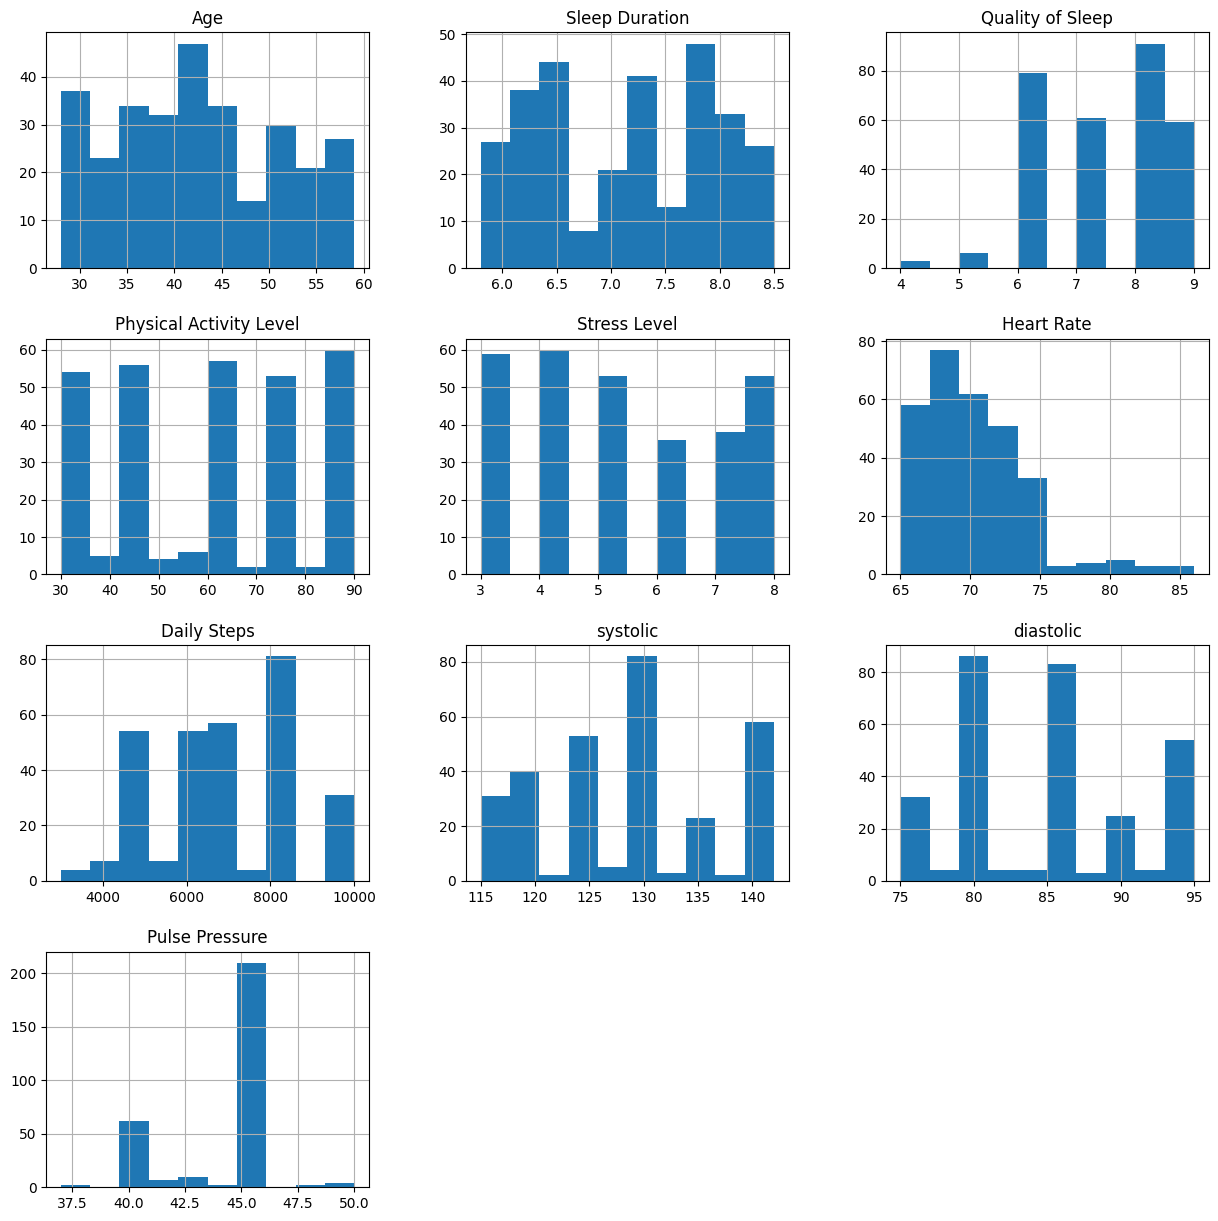

In [38]:
train_set[numericas].hist(figsize = (15,15))
plt.show()

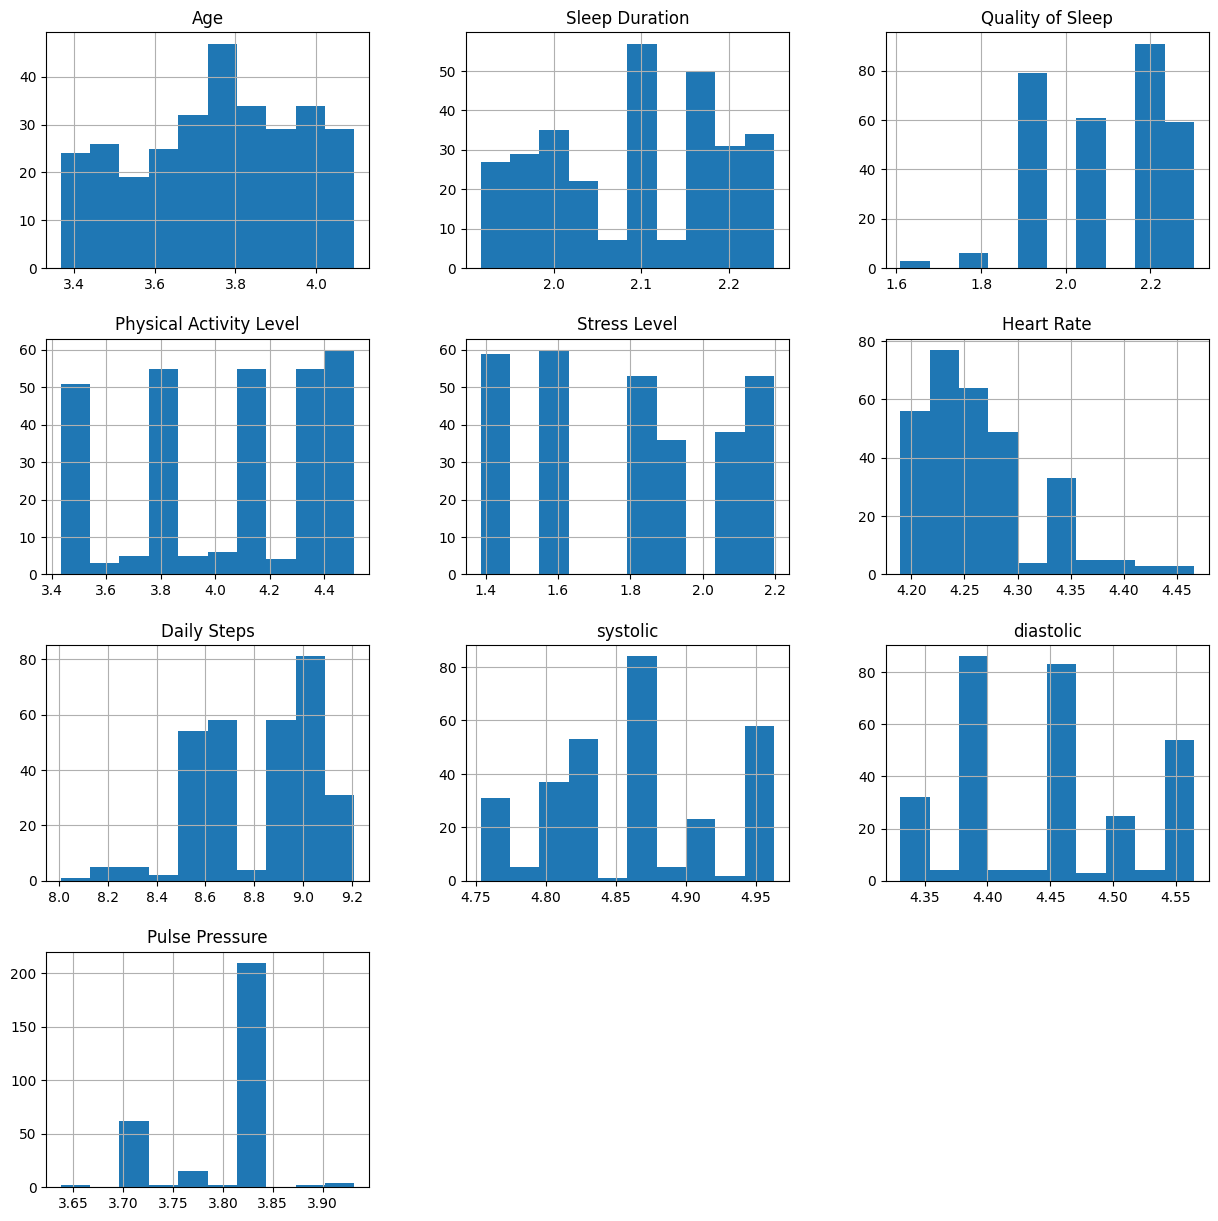

In [39]:
log = np.log1p(train_set[numericas])
log.hist(figsize=(15,15));

## Los datos se ven bien centrados, he probado de pasarle una transformaci√≥n logar√≠tmica pero no hay diferencia significativa 

## Vamos a hacer las mismas transformaciones a los datos de test

In [41]:
test_set.sample(5)

Gender  Age   Occupation  Sleep Duration  Quality of Sleep  \
Person ID                                                               
232          Male   44  Salesperson             6.3                 6   
74           Male   33       Doctor             6.1                 6   
346        Female   57        Nurse             8.2                 9   
23           Male   30       Doctor             7.7                 7   
362        Female   59        Nurse             8.2                 9   

           Physical Activity Level  Stress Level BMI Category Blood Pressure  \
Person ID                                                                      
232                             45             7   Overweight         130/85   
74                              30             8       Normal         125/80   
346                             75             3   Overweight         140/95   
23                              75             6       Normal         120/80   
362                             75             3   Overweight         140/95   

           Heart Rate  Daily Steps  Sleep Disorder  
Person ID                                           
232                72         6000               1  
74                 72         5000               0  
346                68         7000               1  
23                 70         8000               0  
362                68         7000               1

In [42]:
test_set.reset_index(inplace=True)
test_set.drop(columns = 'Person ID', inplace=True)
test_set.rename(columns = {'Sleep Disorder':'target'}, inplace=True)
# vamos a separar la columna de 'blood pressure' y vamos a calcular la presi√≥n del pulso
test_set[['systolic','diastolic']] = test_set['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
test_set.drop(columns='Blood Pressure', inplace=True)
test_set['systolic'] = test_set['systolic'].astype(int)
test_set['diastolic'] = test_set['diastolic'].astype(int)
test_set['Pulse Pressure'] = test_set['systolic'] - test_set['diastolic']
# vamos a codificar esas features categ√≥ricas
test_set['Gender_code'] = test_set['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
test_set['BMI Category'] = test_set['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
test_set['BMI Category_code'] = test_set['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)
dummies_test = pd.get_dummies(test_set['Occupation']).astype(int)
test_set = pd.concat([test_set, dummies_test], axis = 1)

In [43]:
X_test = test_set.drop(columns = 'target')
y_test = test_set['target']

## Selecci√≥n de features

He probado diferentes m√©todos para seleccionar las mejores features, incluyendo `mutual_info_classif`, `test de hip√≥tesis`, `SelectFromModel`, `RFE`, `SFS`, `feature importance`, `Lasso`, `hard voting` y `selecci√≥n manual`. Tras comparar el rendimiento de los modelos con cada enfoque, eleg√≠ estas variables con el `select from model` por ofrecer el mejor equilibrio entre precisi√≥n y utilidad.

In [44]:
mutual_info_classif
X = train_set[numericas]
y = train_set['target']

mic = mutual_info_classif(X, y)
print(pd.Series(mic, index=X.columns).sort_values(ascending=False))

systolic                   0.358599
diastolic                  0.340943
Sleep Duration             0.315532
Daily Steps                0.271977
Age                        0.263672
Physical Activity Level    0.183018
Pulse Pressure             0.168918
Stress Level               0.153716
Quality of Sleep           0.106148
Heart Rate                 0.102002
dtype: float64


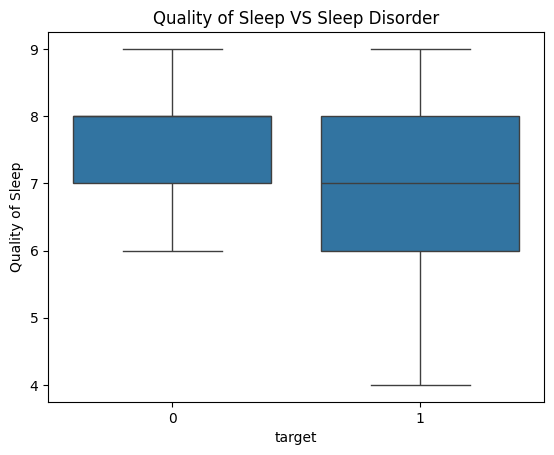

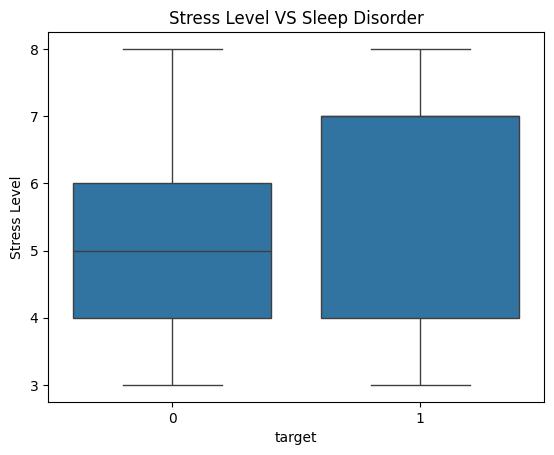

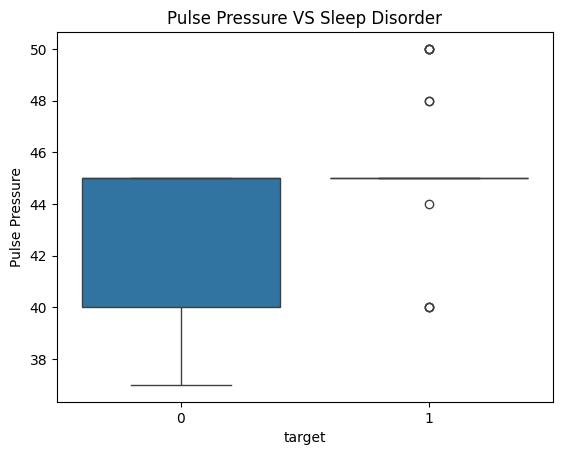

In [45]:
lista = ['Quality of Sleep', 'Stress Level', 'Pulse Pressure']
for x in lista:
    plt.figure()
    sns.boxplot(data=train_set, x='target', y=x)
    plt.title(f'{x} VS Sleep Disorder')

## Parece ser que las √∫ltimas tres son las peores, 'Quality of Sleep', 'Stress Level', 'Pulse Pressure', podemos probar modelos con estas features y sin estas features, si son modelos de arboles por ejemplo, quiz√°s les funciona bien, podemos probar con test de Mann-Whitney U para ver que resultado tiene, ya que seria un contraste de categorica binaria con num√©rica

## Test de Mann-Whitney U

In [46]:
for x in lista:
    grupo_a = train_set.loc[train_set.target == 0][x]
    grupo_b = train_set.loc[train_set.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estad√≠stico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estad√≠sticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Quality of Sleep -
Estad√≠stico U: 14700.0
Valor p: 5.277403177210805e-08
Hay diferencia estad√≠sticamente significativa
------------------------------
- Stress Level -
Estad√≠stico U: 8682.5
Valor p: 0.003116433630214749
Hay diferencia estad√≠sticamente significativa
------------------------------
- Pulse Pressure -
Estad√≠stico U: 6011.5
Valor p: 3.7269868670039093e-16
Hay diferencia estad√≠sticamente significativa
------------------------------


## Como vemos con un test estad√≠stico rechazamos la hip√≥tesis nula, tenemos confianza estad√≠stica, hay relaci√≥n entre los valores

In [47]:
features_todas = categoricas_int + numericas

In [48]:
X_train = train_set[features_todas]
y_train = train_set['target']

In [49]:
# SelectFromModel
r_forest = RandomForestClassifier(random_state = 42)

selector_model = SelectFromModel(estimator= r_forest, threshold='median')
selector_model.fit(X_train, y_train)
select_from_model = selector_model.get_feature_names_out().tolist()
select_from_model

['Nurse',
 'BMI Category_code',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic',
 'diastolic',
 'Pulse Pressure']

## Voy a hacer un test de hip√≥tesis a estas features que son las que usaremos

In [50]:
lista_num = select_from_model + [target]

In [51]:
for x in lista_num:
    grupo_a = train_set.loc[train_set.target == 0][x]
    grupo_b = train_set.loc[train_set.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estad√≠stico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estad√≠sticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Nurse -
Estad√≠stico U: 6801.5
Valor p: 4.770633582427406e-15
Hay diferencia estad√≠sticamente significativa
------------------------------
- BMI Category_code -
Estad√≠stico U: 2128.0
Valor p: 1.9243671628516113e-43
Hay diferencia estad√≠sticamente significativa
------------------------------
- Age -
Estad√≠stico U: 5137.5
Valor p: 1.0056724569177982e-14
Hay diferencia estad√≠sticamente significativa
------------------------------
- Sleep Duration -
Estad√≠stico U: 15014.0
Valor p: 1.16775103569525e-08
Hay diferencia estad√≠sticamente significativa
------------------------------
- Quality of Sleep -
Estad√≠stico U: 14700.0
Valor p: 5.277403177210805e-08
Hay diferencia estad√≠sticamente significativa
------------------------------
- Physical Activity Level -
Estad√≠stico U: 10221.5
Valor p: 0.4061957203875094
No hay diferencia suficiente
------------------------------
- Stress Level -
Estad√≠stico U: 8682.5
Valor p: 0.003116433630214749
Hay diferencia estad√≠sticamente significativa


## Todas las features menos dos tienen diferencia estad√≠sticamente significativa, aun as√≠, esas dos, que son, Physical Activity Level y Daily Steps las voy a dejar porque son importantes para la salud el deporte

## Seguimos con el resto de m√©todos de selecci√≥n de features

In [52]:
# RFE
rfe = RFE(estimator= r_forest)
rfe.fit(X_train, y_train)
rfe.transform(X_train)
RFEv = rfe.get_feature_names_out().tolist()

In [53]:
# hard-voting

features_hard_voting = select_from_model + RFEv + select_from_model
votos = Counter(features_hard_voting)

In [54]:
seleccion = [x for x,y in votos.most_common(10)]

In [55]:
# Feature importance

r_forest.fit(X_train, y_train)

importances = r_forest.feature_importances_
feature_names = X_train.columns

features_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

## Hacemos un filtrado para quitar ruido

In [56]:
feature_importance = [x for x,y in features_importance.items() if y >= 0.01]

In [57]:
# LASSO
modelo = Lasso(alpha=0.01).fit(X_train, y_train)

importance = np.abs(modelo.coef_)
lasso_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

## Hacemos un filtrado para quitar ruido

In [58]:
lasso_import = [x for x,y in lasso_importance.items() if y >= 0.01]

## Voy a preparar un diccionario para probar con diferentes features, tambi√©n, voy a probar de quitar algunas features que al principio gener√≥ duda de si ser√≠an √∫til o no

In [59]:
no_stress = [x for x in features_todas if x != 'Stress Level']
no_systolic = [x for x in features_todas if x != 'systolic']
no_diastolic = [x for x in features_todas if x != 'diastolic']
solo_pulse_pressure = [x for x in no_diastolic if x != 'systolic']
solo_diastolic = [x for x in no_systolic if x != 'Pulse Pressure']
solo_systolic = [x for x in no_diastolic if x != 'Pulse Pressure']

In [60]:
posibles_features = {
    'todas' : features_todas,
    'SFM' : select_from_model,
    'RFE' : RFEv,
    'SFS' : select_from_model,
    'todas_no_stress' : no_stress,
    'todas_no_systolic' : no_systolic,
    'todas_no_diastolic' : no_diastolic,
    'solo_pulse_pressure' : solo_pulse_pressure,
    'solo_diastolic' : solo_diastolic,
    'solo_systolic' : solo_systolic,
    'hard voting':seleccion,
    'feature_importance': feature_importance,
    'lasso_import' : lasso_import
}

## Voy a pasar las features con tipo 'object' a catboost y lightgbm, tengo que modificar el diccionario de las features para poderlo hacer

In [61]:
cat_gbm = {
    'Gender_code': 'Gender',
    'Accountant' : 'Occupation',
    'Doctor' : 'Occupation',
    'Engineer' :'Occupation',
    'Lawyer' : 'Occupation',
    'Manager' : 'Occupation',
    'Nurse' : 'Occupation',
    'Sales Representative' : 'Occupation',
    'Salesperson' : 'Occupation',
    'Scientist' : 'Occupation',
    'Software Engineer' : 'Occupation',
    'Teacher' : 'Occupation',
    'BMI Category_code': 'BMI Category'
}

## Aqu√≠ soluciono y creo un nuevo diccionario con las num√©ricas y las categ√≥ricas de tipo 'object'

In [62]:
dict_features_cat_gbm = {}
for x,y in posibles_features.items():
    lista = []
    for a in y:
        if a in cat_gbm:
            lista.append(cat_gbm[a])
        else: 
            lista.append(a)
    dict_features_cat_gbm[x] = list(set(lista))

## Comparaci√≥n de Modelos

Con un bucle prob√© diferentes modelo (baseline):

* `RandomForestClassifier`
* `XGBClassifier`
* `LGBMClassifier`
* `GradientBoostingClassifier`
* `CatBoostClassifier`
* `DecisionTreeClassifier`
* `LogisticRegression`
* `KNeighborsClassifier`
* `SVC`

Todos fueron evaluados mediante **validaci√≥n cruzada** con los scorings:
**`recall`**, **`f1`** y **`roc_auc`**.

Compar√© los resultados entre ellos mismos, seleccion√© los modelos con mejor rendimiento e hice pruebas, ajust√© hiperpar√°metros a cada modelo. La elecci√≥n final del mejor modelo fue en base a obtener:

* **`classification_report`**
* **Importancia de variables (`feature_importances_`)**
* **`ConfusionMatrixDisplay`**

Viendo esto, me pude asegurar que lo que estaba eligiendo estaba funcionando bien.

In [63]:
#Instanciamos los modelos
rforest = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(verbosity = 0, random_state= 42)
lgb = LGBMClassifier(verbose = -1, random_state= 42)
gradient = GradientBoostingClassifier(random_state= 42)
cat= CatBoostClassifier(verbose = False, random_state= 42)
tree = DecisionTreeClassifier(random_state= 42)
linear = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

#instanciamos el escalador para los modelos sensibles a la escala
scaler = StandardScaler()

# cremos un diccionario con todos los modelos
modelos = {
    'random forest' : rforest,
    'xgboost' : xgb,
    'light gbm' : lgb,
    'gradient' : gradient,
    'cat':cat,
    'tree':tree,
    'linear':linear,
    'knn': knn,
    'svc': svc
}

# asignamos las features con tipo 'category' para los modelos de catboost y lightgbm que aceptan este tipo de variables
categoricas = ['Gender', 'Occupation', 'BMI Category']

# vamos a hacer un bucle que depende del modelo se hara√°n unas cosas u otras y todo se guarda en un diccionario para visualizarlo en un dataframe
resultados = []
for nombre, modelo in modelos.items():
    if nombre in ['linear','knn', 'svc']:
        for clave, valor in posibles_features.items():
            X_train_escalado = scaler.fit_transform(X_train[valor])
            cross = cross_validate(modelo, X_train_escalado, y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
            
    elif nombre == 'light gbm':
        for clave, valor in dict_features_cat_gbm.items():
            category = [x for x in categoricas if x in valor] # selecciona las categoricas que usamos en este momento para asignarlas al modelo
            lgb_2 = LGBMClassifier(verbose = -1, random_state= 42, categorical_feature=category) # aqui se le informa cuales son de tipo 'category'
            cross = cross_validate(lgb_2, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': 'lgb',
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
                
    elif nombre == 'cat':
        for clave, valor in dict_features_cat_gbm.items():
            category = [x for x in categoricas if x in valor]
            cat_2= CatBoostClassifier(verbose = False, random_state= 42, cat_features= category)
            cross = cross_validate(cat_2, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': 'cat',
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })
                
    else:
        for clave, valor in posibles_features.items():
            cross = cross_validate(modelo, train_set[valor], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
            resultados.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'recall' : np.mean(cross['test_recall']),
                'f1' : np.mean(cross['test_f1']),
                'roc_auc' : np.mean(cross['test_roc_auc'])
            })   

In [64]:
resultado_baseline = pd.DataFrame(resultados).sort_values(by= 'recall', ascending=False)

In [65]:
pd.set_option('display.max_rows', None)

## Vamos a ver los resultados que tenemos con un filtrado para as√≠ ser m√°s selectivo

In [66]:
resultado_baseline.loc[(resultado_baseline['recall'] > 0.91) & (resultado_baseline['roc_auc'] > 0.9) & (resultado_baseline['metodo seleccion features'] != 'SFS')]

modelo metodo seleccion features  recall        f1   roc_auc
48        gradient             solo_systolic   0.919  0.918357  0.903549
45        gradient        todas_no_diastolic   0.919  0.918357  0.904012
37             lgb        feature_importance   0.919  0.918357  0.904151
38             lgb              lasso_import   0.919  0.915506  0.902562
39        gradient                     todas   0.919  0.918357  0.902390
40        gradient                       SFM   0.919  0.918357  0.907643
41        gradient                       RFE   0.919  0.918357  0.906073
33             lgb       solo_pulse_pressure   0.919  0.914587  0.902948
34             lgb            solo_diastolic   0.919  0.918357  0.904945
36             lgb               hard voting   0.919  0.918357  0.902432
30             lgb           todas_no_stress   0.919  0.918357  0.903251
31             lgb         todas_no_systolic   0.919  0.918357  0.903360
28             lgb                       RFE   0.919  0.918357  0.903104
25         xgboost              lasso_import   0.919  0.922229  0.901012
26             lgb                     todas   0.919  0.918357  0.903904
27             lgb                       SFM   0.919  0.918357  0.904151
21         xgboost            solo_diastolic   0.919  0.904272  0.900884
51        gradient              lasso_import   0.919  0.926000  0.912129
50        gradient        feature_importance   0.919  0.918357  0.903174
52             cat                     todas   0.919  0.922229  0.906052
44        gradient         todas_no_systolic   0.919  0.918357  0.902164
49        gradient               hard voting   0.919  0.918357  0.905273
43        gradient           todas_no_stress   0.919  0.918357  0.902619
61             cat             solo_systolic   0.919  0.918637  0.907686
86          linear            solo_diastolic   0.919  0.897229  0.911371
87          linear             solo_systolic   0.919  0.908463  0.912108
114            svc               hard voting   0.919  0.915685  0.925746
115            svc        feature_importance   0.919  0.915685  0.924351
105            svc                       SFM   0.919  0.922408  0.934951
106            svc                       RFE   0.919  0.922408  0.931728
77            tree              lasso_import   0.919  0.926000  0.923033
82          linear           todas_no_stress   0.919  0.908014  0.907932
83          linear         todas_no_systolic   0.919  0.904563  0.910913
78          linear                     todas   0.919  0.908014  0.909304
84          linear        todas_no_diastolic   0.919  0.908463  0.912584
64             cat              lasso_import   0.919  0.915506  0.908668
63             cat        feature_importance   0.919  0.922229  0.905598
62             cat               hard voting   0.919  0.919277  0.907693
53             cat                       SFM   0.919  0.922229  0.905598
60             cat            solo_diastolic   0.919  0.911914  0.907674
59             cat       solo_pulse_pressure   0.919  0.918637  0.902401
58             cat        todas_no_diastolic   0.919  0.922229  0.906290
57             cat         todas_no_systolic   0.919  0.915506  0.906302
56             cat           todas_no_stress   0.919  0.922229  0.904464
54             cat                       RFE   0.919  0.922229  0.904001
19         xgboost        todas_no_diastolic   0.911  0.913595  0.903303
13         xgboost                     todas   0.911  0.913595  0.903443
15         xgboost                       RFE   0.911  0.913595  0.902472
24         xgboost        feature_importance   0.911  0.913595  0.901884
35             lgb             solo_systolic   0.911  0.913595  0.904840
17         xgboost           todas_no_stress   0.911  0.913595  0.901431
12   random forest              lasso_import   0.911  0.921238  0.908704
14         xgboost                       SFM   0.911  0.913595  0.902362
85          linear       solo_pulse_pressure   0.911  0.896115  0.9044

In [67]:
pd.reset_option('display.max_rows')

|Modelo|Features|Recall|F1|roc_auc|
|-|-|-|-|-|
97	|SVC|SFM|0.919|0.922|0.934|
98	|SVC|RFE|0.919|0.922|0.931|
50	|CatBoost|RFE|0.919|0.922|0.905|
54	|CatBoost|todas_no_diastolic|0.919|0.922|0.906|
49	|CatBoost|SFM|0.919|0.922|0.905|
23	|XGBoost|lasso_import|0.919|0.922|0.901|
58	|CatBoost|feature_importance|0.919|0.922|0.905|

## Vamos a hacer validaci√≥n cruzada para ver los resultados

In [68]:
#Instanciamos el modelo
rforest = RandomForestClassifier(random_state= 42)

In [69]:
resultados = []
cross = cross_validate(rforest, train_set[select_from_model], y_train, cv = 5 , scoring = ['recall', 'f1', 'roc_auc'])
resultados.append({
        'recall' : np.mean(cross['test_recall']),
        'f1' : np.mean(cross['test_f1']),
        'roc_auc' : np.mean(cross['test_roc_auc'])
    })

In [70]:
resultado_baseline = pd.DataFrame(resultados)

In [71]:
resultado_baseline

recall        f1   roc_auc
0   0.894  0.904468  0.912773

## El modelo RandomForest da unos resultados muy buenos de recall

In [72]:

# Aqu√≠ iria el proceso de pruebas con los mejores modelos y diferentes features, vamos directos al que funciona y he usado


## Al modelo le vamos a pasar unos hiperpar√°metros y un GridSearchCV

In [73]:
# RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)
param_grid_rf2 = {
    'n_estimators': [100, 200,300],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf2 = GridSearchCV(
    rf2,
    param_grid_rf2,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid_rf2.fit(train_set[select_from_model], y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [74]:
modelo1_mejores_params = grid_rf2.best_params_

In [75]:
grid_rf2.best_params_

{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [76]:
y_pred = grid_rf2.best_estimator_.predict(test_set[select_from_model])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.97      0.94      0.95        32

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



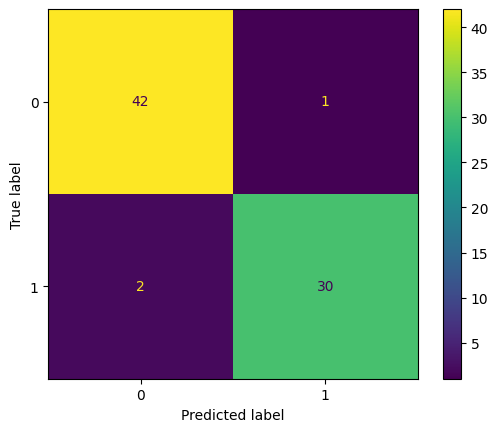

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Nos indica que ha clasificado a 42 sin problema de sue√±o que no tienen problema y a 1 que tiene problema del sue√±o que realmente no tiene, para los que tienen problema de sue√±o a clasificado 30 como que tienen problemas y a 2 que no tienen y realmente si tienen problema de sue√±o 

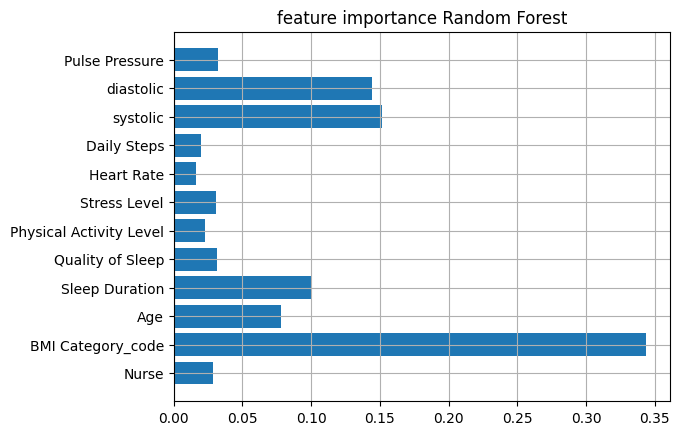

In [78]:
rf2.fit(train_set[select_from_model], y_train)
plt.barh(train_set[select_from_model].columns,rf2.feature_importances_)
plt.title('feature importance Random Forest')
plt.grid(True);

## RandomForest nos da una buena distribuci√≥n de la importancia de las features en el modelo

# Ahora voy a hacer un Pipeline para la transformaci√≥n de datos para la producci√≥n y guardar el modelo y el pipeline, necesito cargar los datos y hacer las mismas transformaciones

In [79]:
dataset = pd.read_csv('./src/data/Sleep_Health_and_Lifestyle.csv')

In [80]:
dataset.drop(columns='Person ID', inplace=True)
dataset.drop(columns='Gender', inplace=True)
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].fillna('NaN')
mapeo = {'NaN':0, 'Sleep Apnea':1, 'Insomnia':1}
dataset['Sleep Disorder'] = dataset['Sleep Disorder'].map(mapeo)
dataset.rename(columns={'Sleep Disorder':'target'}, inplace=True)
dataset[['systolic','diastolic']] = dataset['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
dataset.drop(columns='Blood Pressure', inplace=True)
dataset['systolic'] = dataset['systolic'].astype(int)
dataset['diastolic'] = dataset['diastolic'].astype(int)
dataset['BMI Category'] = dataset['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
dummies_test = pd.get_dummies(dataset['Occupation']).astype(int)
dataset = pd.concat([dataset, dummies_test], axis = 1)
dataset['BMI Category'] = dataset['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)
dataset['Pulse Pressure'] = dataset['systolic'] - dataset['diastolic']

In [81]:
profesiones = ['Occupation','Accountant','Doctor','Engineer','Lawyer','Manager','Sales Representative','Salesperson','Scientist','Software Engineer','Teacher'] 

In [82]:
cols = [x for x in dataset.columns if x not in profesiones]

In [83]:
cols = cols + ['Pulse Pressure']

In [84]:
dataset[cols].sample(5)

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
229   44             6.3                 6                       45   
99    36             7.1                 8                       60   
71    33             6.1                 6                       30   
39    31             7.6                 7                       75   
196   43             6.5                 6                       45   

     Stress Level  BMI Category  Heart Rate  Daily Steps  target  systolic  \
229             7             1          72         6000       1       130   
99              4             0          68         7000       0       115   
71              8             0          72         5000       0       125   
39              6             0          70         8000       0       120   
196             7             1          72         6000       1       130   

     diastolic  Nurse  Pulse Pressure  Pulse Pressure  
229         85      0              45              45  
99          75      0              40              40  
71          80      0              45              45  
39          80      0              40              40  
196         85      0              45              45

In [85]:
X_t = dataset[cols].drop(columns='target')
y_t = dataset[cols]['target']

## Despu√©s de hacer las transformaciones como anteriormente, vamos a construir unas funciones para pipeline

In [86]:
# para sacar el bmi
def bmi(X):
    X = X.copy()
    X['bmi'] = X['peso'] / (X['altura'] ** 2)
    return X

# clasifica el bmi segun el bmi obtenido
def bmi_clasificador(X):
    X = X.copy()
    X['BMI Category'] = (X['bmi'] >= 25.0).astype(int)
    return X[['BMI Category']]

# hace el c√°lculo para sacar la presion del pulso
def Pulse_Pressure(X):
    X = X.copy()
    X['Pulse Pressure'] = X['systolic'] - X['diastolic']
    return X
    
# codifica seg√∫n la respuesta del formulario
def nurse_func(X):
    return (X == 'S√≠').astype(int)

## Vamos a hacer el pipeline

In [87]:
# primero metemos en pipeline estos dos pasos, porque primero va un paso del calculo y luego codificarla a 0 o 1
bmi_1 = FunctionTransformer(bmi)
bmi_2 = FunctionTransformer(bmi_clasificador)

pipeline_bmi = Pipeline([
    ('bmi_num', bmi_1),
    ('bmi_code', bmi_2)
])
#para pulso solo hay un paso
pulso = FunctionTransformer(Pulse_Pressure)
nurse = FunctionTransformer(nurse_func)

# metemos todo en el columntransformer para que se hagan los cambios
preprocessor = ColumnTransformer(
    transformers=[
        ('bmi', pipeline_bmi, ['peso', 'altura']),
        ('pulse_pressure', pulso, ['systolic', 'diastolic']),
        ('nurse', nurse, ['Nurse'])
    ],
    remainder='passthrough'
)
# paso el passthrough_transformer con 'systolic', 'diastolic' para que aparezcan tambi√©n en el dataset para el modelo
# el remainder se pone en 'passthrough' para que no afecte al resto de columnas

# este es el pipeline con todo dentro
pipeline1 = Pipeline([
    ('preprocessor', preprocessor)
])

## Tenemos que hacer el fit del pipeline con datos creados por mi, porque lo que el usuario introduzca yo ya lo tengo transformado como el 'bmi', 'presi√≥n del pulso'...

In [88]:
pipe_1 = pd.DataFrame({
                'Nurse':'S√≠',
                'Age':27,
                'Sleep Duration':6.1,
                'Quality of Sleep':6,
                'Physical Activity Level': 42,
                'Stress Level':6,
                'Heart Rate':77,
                'Daily Steps':4200,
                'systolic':126,
                'diastolic':83,
                'peso':70,
                'altura':1.80
}, index = dataset[cols].index)

In [89]:
pipe_1 = pipe_1.iloc[[0]]

In [90]:
pipeline1.fit(pipe_1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('bmi',
                                                  Pipeline(steps=[('bmi_num',
                                                                   FunctionTransformer(func=<function bmi at 0x0000013DEDCDAE60>)),
                                                                  ('bmi_code',
                                                                   FunctionTransformer(func=<function bmi_clasificador at 0x0000013DEDCDB640>))]),
                                                  ['peso', 'altura']),
                                                 ('pulse_pressure',
                                                  FunctionTransformer(func=<function Pulse_Pressure at 0x0000013DEDCDA3B0>),
                                                  ['systolic', 'diastolic']),
                                                 ('nurse',
                                                  FunctionTransformer(func=<function nurse_func at 0x0000013DEDCDAB00>),
                                                  ['Nurse'])]))])

# Hacemos un fit del modelo RandomForest tambi√©n para poder guardarlo, en este caso no lo pongo dentro del pipeline, ir√° fuera

In [91]:
# ponemos el modelo con los mejores hiperparametros
modelo = RandomForestClassifier(random_state=42, **modelo1_mejores_params)
# se entrena el modelo con todos los datos que tenemos, este modelo es el definitivo
modelo.fit(X_t, y_t)

RandomForestClassifier(max_depth=2, random_state=42)

## Guardamos el modelo y el pipeline con joblib

In [92]:
joblib.dump(modelo, './src/models/modelo_entrenado_1_R_F.joblib')

['./src/models/modelo_entrenado_1_R_F.joblib']

In [93]:
joblib.dump(pipeline1, './src/models/pipeline_transformacion_1_R_F.joblib')

['./src/models/pipeline_transformacion_1_R_F.joblib']

### Construcci√≥n del Pipeline

Durante la construcci√≥n del pipeline especialmente para la transformaci√≥n de datos, realiz√© diferentes pruebas y ajustes para asegurarme el buen funcionamiento en cada proceso para conseguir un flujo perfecto y robusto.

# **Fase 2**

## Ahora tenemos que clasificar si es insomnio o apnea del sue√±o, de esta forma podemos controlar mejor el 'recall' de si tiene problema o no porque es importante diferenciar bien, ahora queremos la metrica de 'precision'

## Necesito volver al dataset original para seleccionar esas dos opciones del target y hacerle las transformaciones

In [94]:
df2 = pd.read_csv('./src/data/Sleep_Health_and_Lifestyle.csv')

In [95]:
df2.drop(columns = 'Person ID', inplace=True)
df2.dropna(inplace=True)
df2.rename(columns = {'Sleep Disorder': 'target'}, inplace=True)

## El target es casi 50-50, muy igualado

In [96]:
df2['target'].value_counts(True)

target
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64

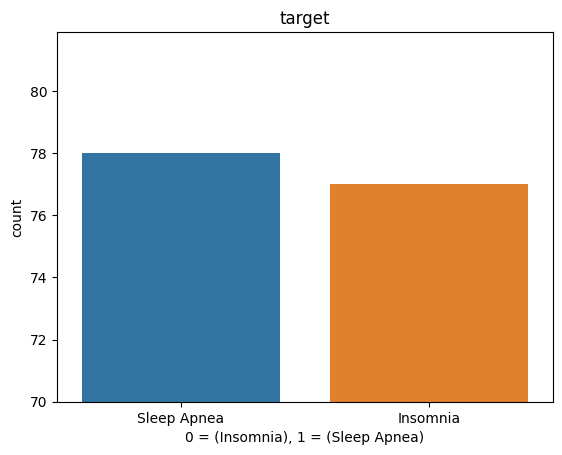

In [97]:
sns.countplot(df2, x= 'target', hue='target')
plt.xlabel('0 = (Insomnia), 1 = (Sleep Apnea)')
plt.title('target')
plt.ylim(70);

In [98]:
# lo codificamos
df2['target'] = df2['target'].map({'Insomnia':0, 'Sleep Apnea':1})

# Voy a hacer esta transformaci√≥n antes del split porque como hay poco valores, luego con los modelos me da error por alguna profesi√≥n que no se encuentra, entonces as√≠ estar√°n todas ya que se hace con One-Hot-Encoding

In [99]:
dummies_train_2 = pd.get_dummies(df2['Occupation']).astype(int)
df2 = pd.concat([df2, dummies_train_2], axis = 1)

## Dividimos en train y test

In [100]:
train_set_2, test_set_2 = train_test_split(df2, test_size=0.2, random_state=42)

In [101]:
print(train_set_2.shape)
print(test_set_2.shape)

(124, 22)
(31, 22)


## Vamos a hacer las mismas transformaciones que arriba

In [102]:
# vamos a separar la columna de 'blood pressure' y vamos a calcular la presi√≥n del pulso
train_set_2[['systolic','diastolic']] = train_set_2['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
train_set_2.drop(columns='Blood Pressure', inplace=True)
train_set_2['systolic'] = train_set_2['systolic'].astype(int)
train_set_2['diastolic'] = train_set_2['diastolic'].astype(int)
train_set_2['Pulse Pressure'] = train_set_2['systolic'] - train_set_2['diastolic']
# vamos a codificar esas features categoricas
train_set_2['Gender_code'] = train_set_2['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
train_set_2['BMI Category'] = train_set_2['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
train_set_2['BMI Category_code'] = train_set_2['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)

## Ahora con los datos de test

In [103]:
# vamos a separar la columna de 'blood pressure' y vamos a calcular la presi√≥n del pulso
test_set_2[['systolic','diastolic']] = test_set_2['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
test_set_2.drop(columns='Blood Pressure', inplace=True)
test_set_2['systolic'] = test_set_2['systolic'].astype(int)
test_set_2['diastolic'] = test_set_2['diastolic'].astype(int)
test_set_2['Pulse Pressure'] = test_set_2['systolic'] - test_set_2['diastolic']
# vamos a codificar esas features categoricas
test_set_2['Gender_code'] = test_set_2['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
# vamos a unir 'normal' con 'normal weight' y 'overweight' con 'obese' porque indican lo mismo
test_set_2['BMI Category'] = test_set_2['BMI Category'].map({'Normal Weight': 'Normal','Normal':'Normal', 'Overweight':'Overweight', 'Obese': 'Overweight'})
test_set_2['BMI Category_code'] = test_set_2['BMI Category'].apply(lambda x: 0 if x == 'Normal' else 1)

In [104]:
X_test_2 = test_set_2.drop(columns='target')
y_test_2 = test_set_2['target']

## El siguiente paso es ver las features comparadas con el target para ver su distribuci√≥n con forma de histogramas y gr√°ficos de barras

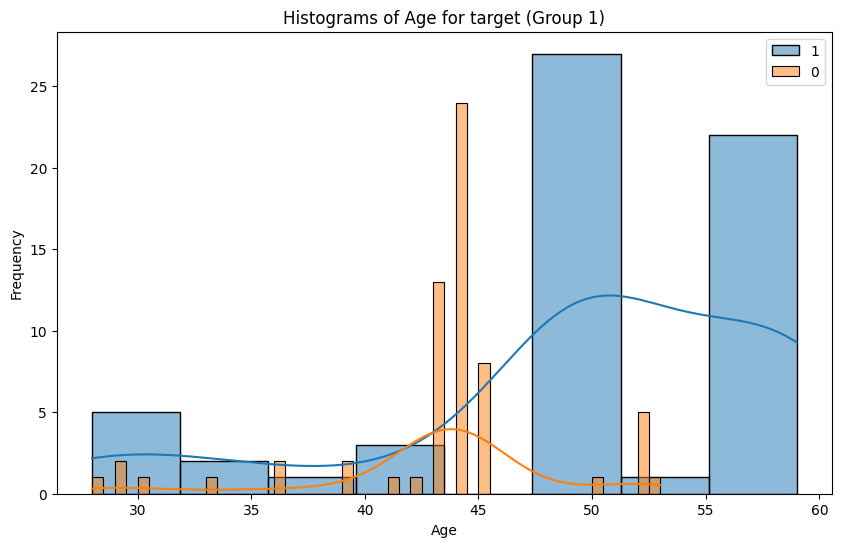

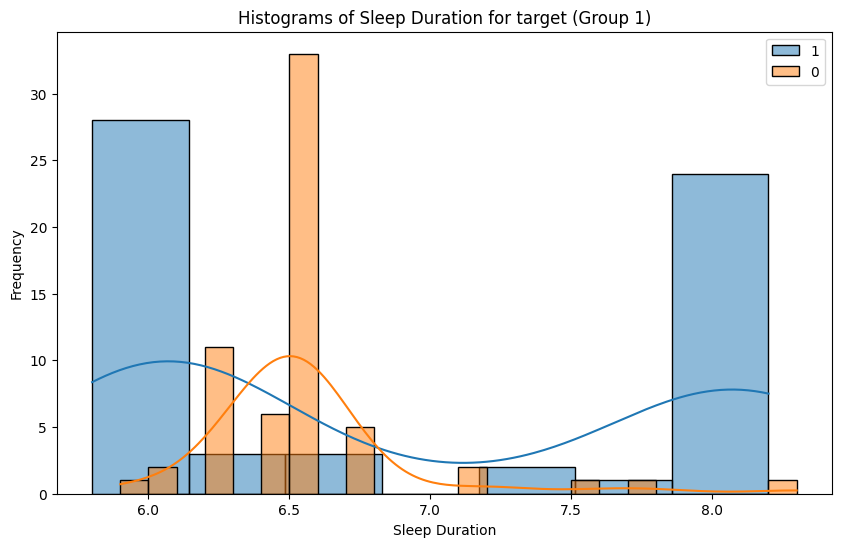

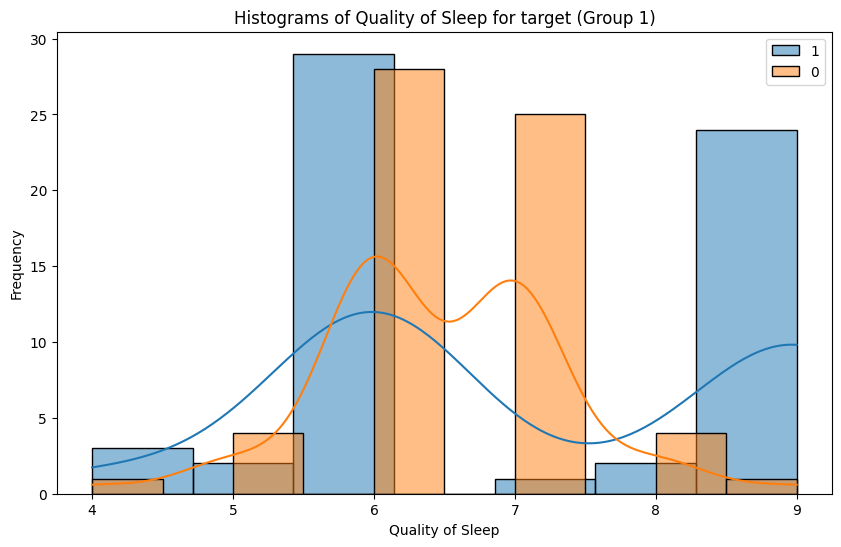

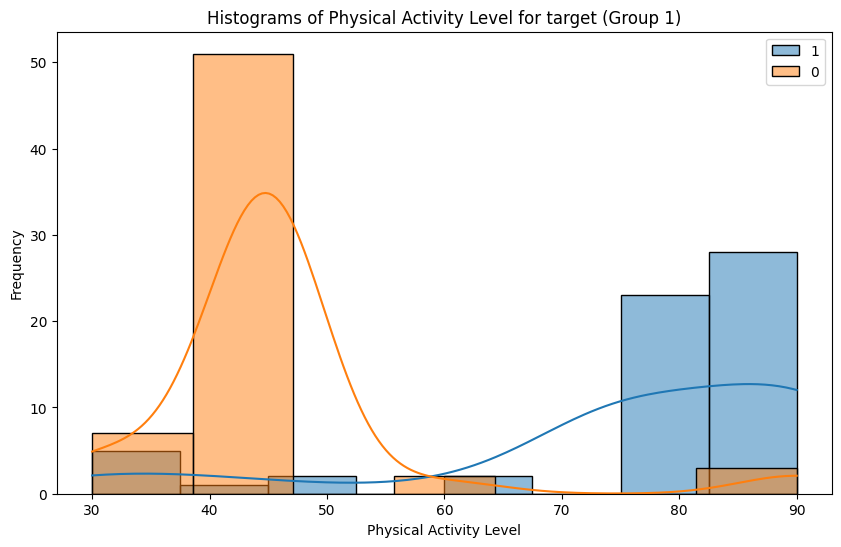

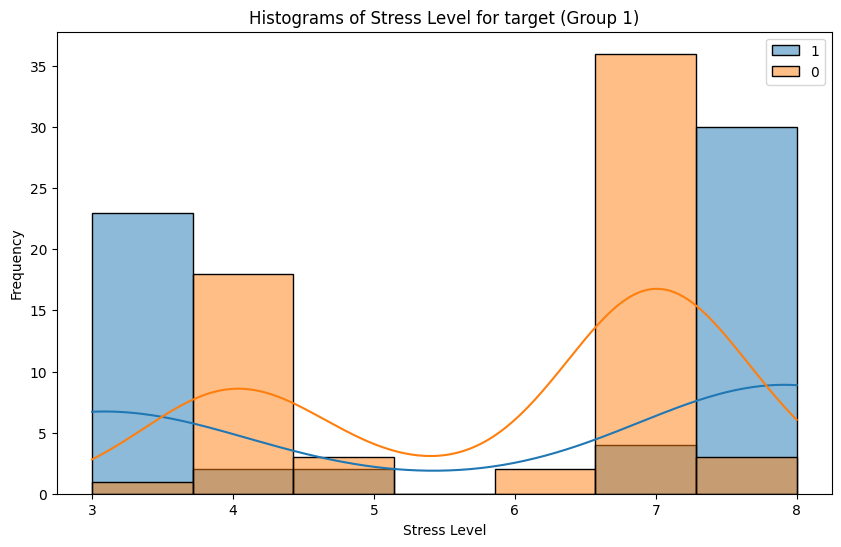

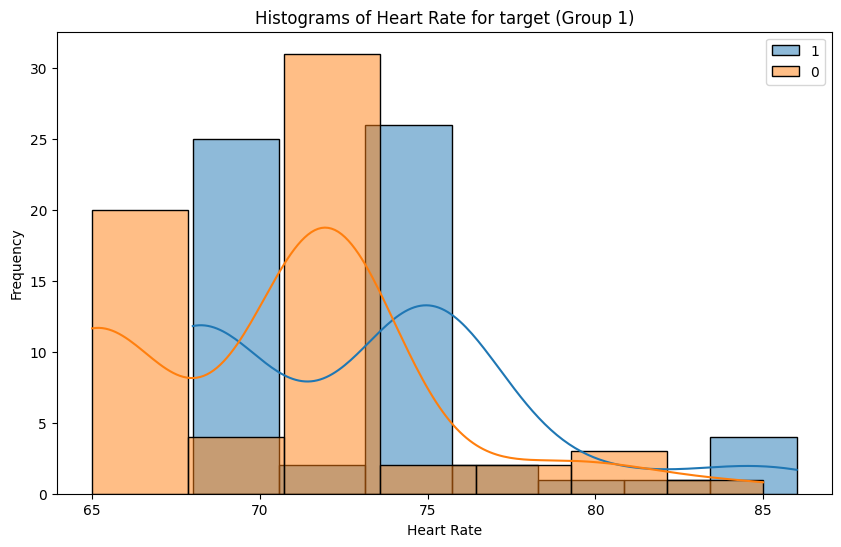

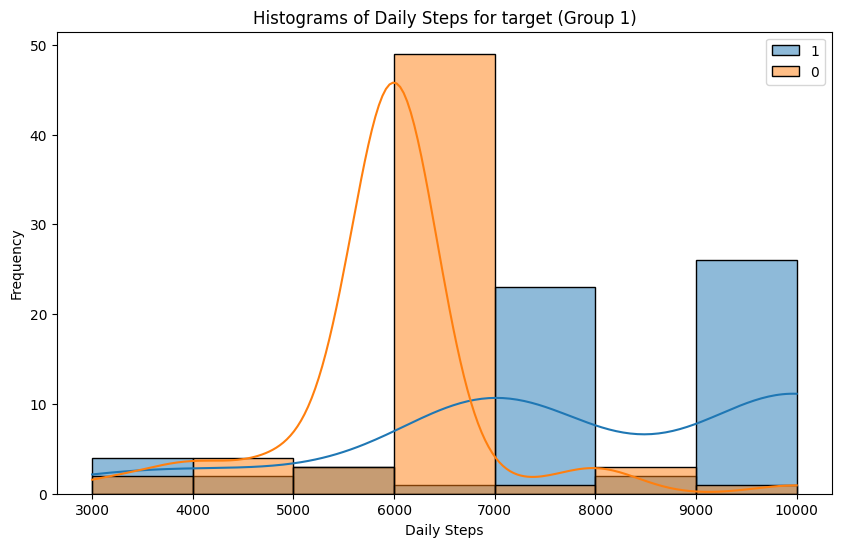

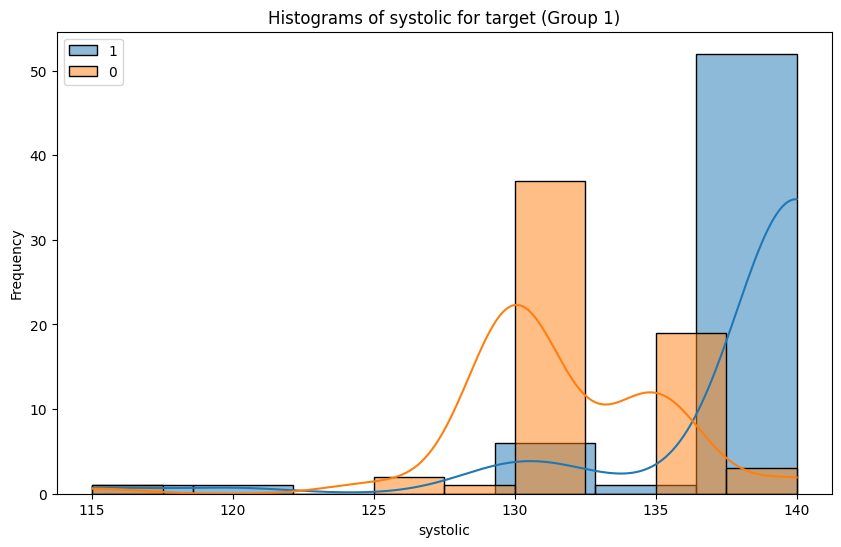

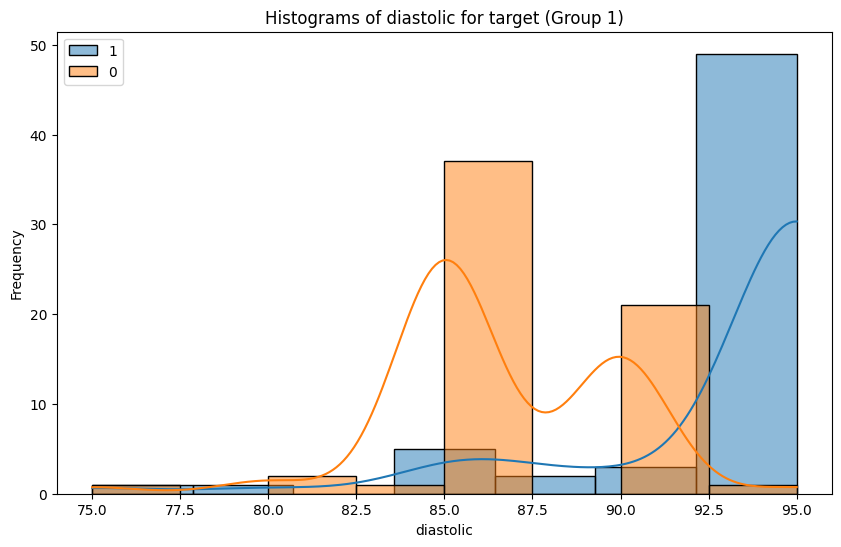

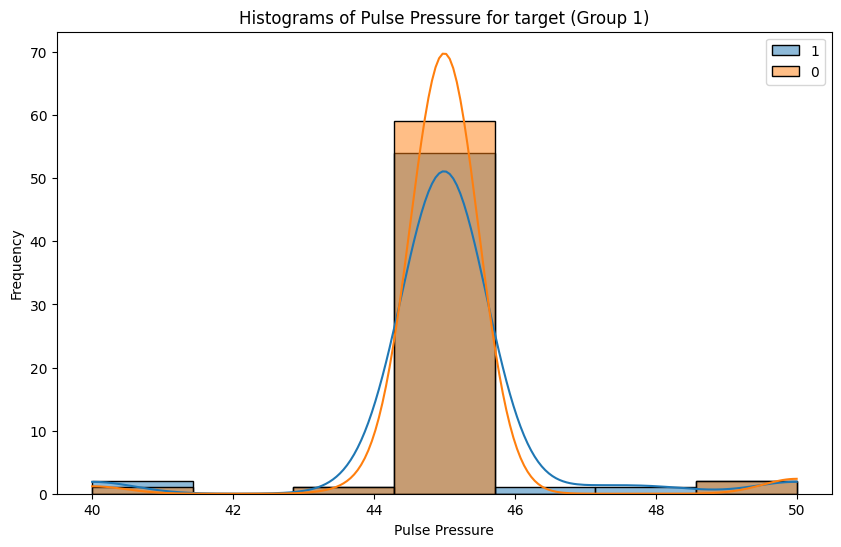

In [105]:
for x in numericas_features:
    plot_grouped_histograms(train_set_2, 'target', x, group_size=2)

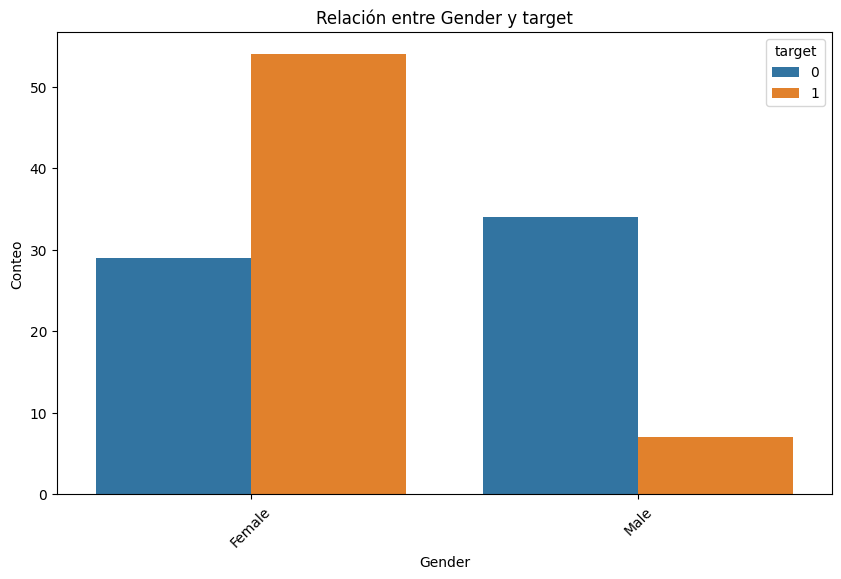

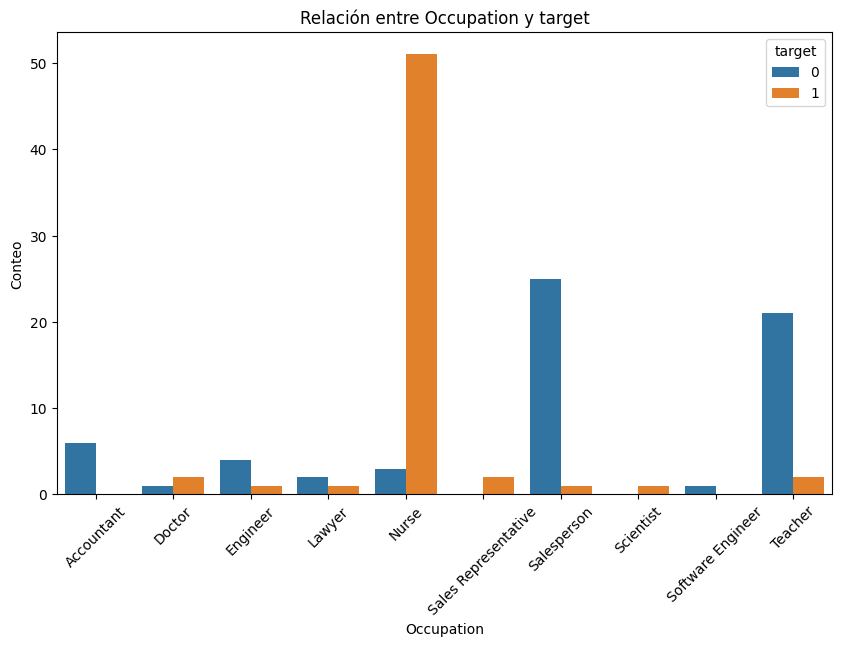

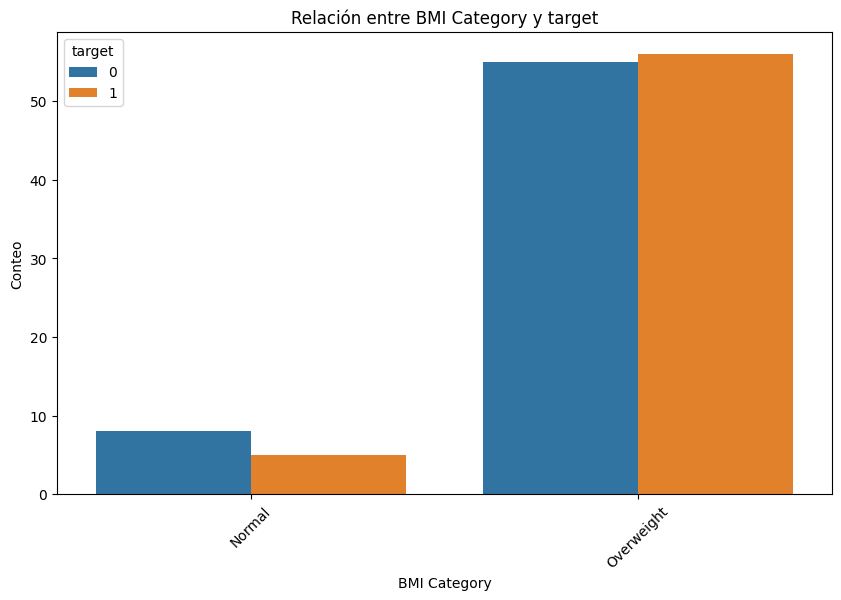

In [106]:
for x in cat_features:
    plot_categorical_relationship_fin(train_set_2, cat_col1=x, cat_col2='target', size_group=11)

## Se ve una buena relaci√≥n entre las features contra el target, hay una diferencia entre los que no tienen problema del sue√±o y los que tienen problemas en el sue√±o.

In [107]:
targett = 'target'

## Vamos a ver la comparaci√≥n de las features con el target, otra forma de verlo con pairplot de seaborn

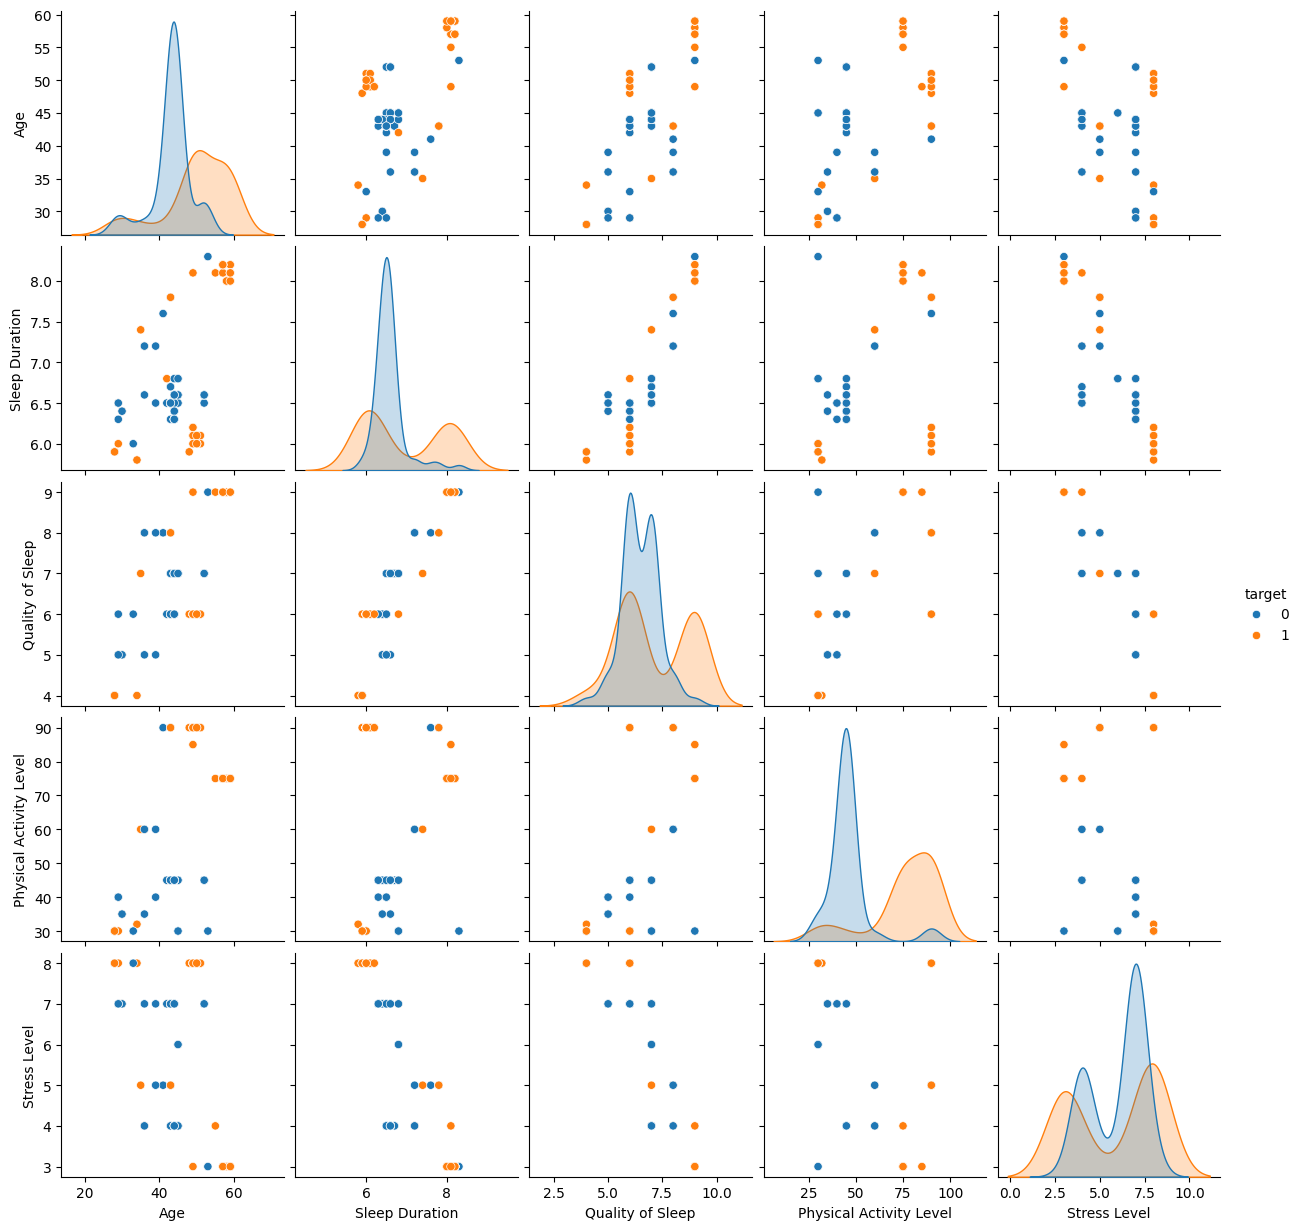

In [108]:
sns.pairplot(train_set_2[numericas[0:5] + [targett]], hue= targett);

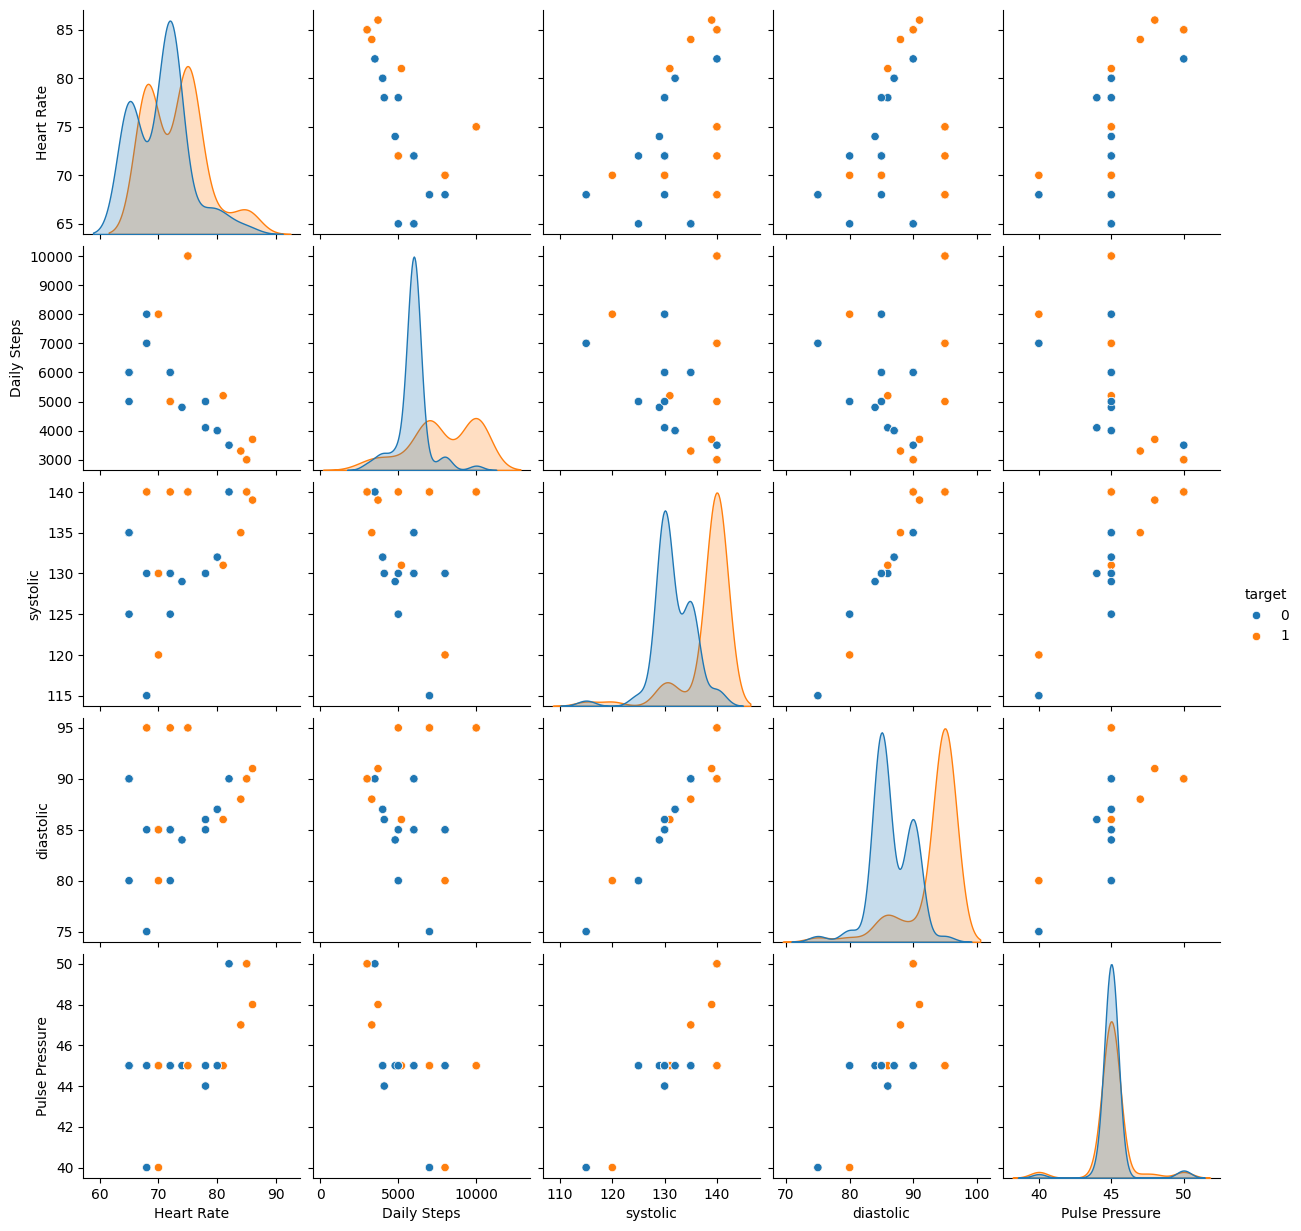

In [109]:
sns.pairplot(train_set_2[numericas[5:] + [targett]], hue= targett);

## Las features contra el target se diferencian bien, lo mismo que vimos en en an√°lisis bivariante anterior

## Selecci√≥n de features

Como anteriormente, he probado diferentes m√©todos para seleccionar las mejores features, incluyendo `mutual_info_classif`, `test de hip√≥tesis`, `SelectFromModel`, `RFE`, `SFS`, `feature importance`, `Lasso`, `hard voting` y `selecci√≥n manual`. Tras comparar el rendimiento de los modelos con cada enfoque, eleg√≠ estas variables con el `select from model` por ofrecer el mejor equilibrio entre precisi√≥n y utilidad.

In [110]:
todas = categoricas_int + numericas

In [111]:
# si nos fijamos manager s√≥lo hay 1, estar√° en los datos de test, lo tenemos que quitar de aqu√≠ para que no de problemas
todas = [x for x in todas if x != 'Manager']

In [112]:
X_train_2 = train_set_2[todas]
y_train_2 = train_set_2['target']

In [113]:
# RFE
r_forest = RandomForestClassifier(random_state = 42)
rfe = RFE(estimator= r_forest)
rfe.fit(X_train_2, y_train_2)
rfe.transform(X_train_2)
RFE = rfe.get_feature_names_out().tolist()
RFE

['Gender_code',
 'Nurse',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps',
 'systolic',
 'diastolic']

## Voy a hacer un test de hip√≥tesis a estas features que son las que usaremos

In [114]:
lista_num = RFE + [targett]

In [115]:
for x in lista_num:
    grupo_a = train_set_2.loc[train_set_2.target == 0][x]
    grupo_b = train_set_2.loc[train_set_2.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estad√≠stico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estad√≠sticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Gender_code -
Estad√≠stico U: 1105.0
Valor p: 5.5853804936747e-07
Hay diferencia estad√≠sticamente significativa
------------------------------
- Nurse -
Estad√≠stico U: 406.5
Valor p: 1.2080857610895516e-18
Hay diferencia estad√≠sticamente significativa
------------------------------
- Age -
Estad√≠stico U: 801.5
Valor p: 1.765514755853017e-08
Hay diferencia estad√≠sticamente significativa
------------------------------
- Sleep Duration -
Estad√≠stico U: 1988.5
Valor p: 0.7383392831626937
No hay diferencia suficiente
------------------------------
- Quality of Sleep -
Estad√≠stico U: 1619.0
Valor p: 0.1086575540433775
No hay diferencia suficiente
------------------------------
- Physical Activity Level -
Estad√≠stico U: 529.5
Valor p: 3.433644702748717e-13
Hay diferencia estad√≠sticamente significativa
------------------------------
- Stress Level -
Estad√≠stico U: 1757.5
Valor p: 0.39833502689469147
No hay diferencia suficiente
------------------------------
- Heart Rate -
Estad√≠s

## Me voy a guardar estas variables, son las que no tienen significancia estad√≠stica

In [116]:
variables = ['Gender_code', 'Nurse', 'Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'systolic', 'diastolic']

In [117]:
# mutual_info_classif

X2 = train_set_2[numericas]
y2 = train_set_2['target']

mic2 = mutual_info_classif(X2, y2)
print(pd.Series(mic, index=X2.columns).sort_values(ascending=False))

systolic                   0.358599
diastolic                  0.340943
Sleep Duration             0.315532
Daily Steps                0.271977
Age                        0.263672
Physical Activity Level    0.183018
Pulse Pressure             0.168918
Stress Level               0.153716
Quality of Sleep           0.106148
Heart Rate                 0.102002
dtype: float64


## Voy a visualizar con el target las √∫ltimas cuatro que son los que peores resultados tienen

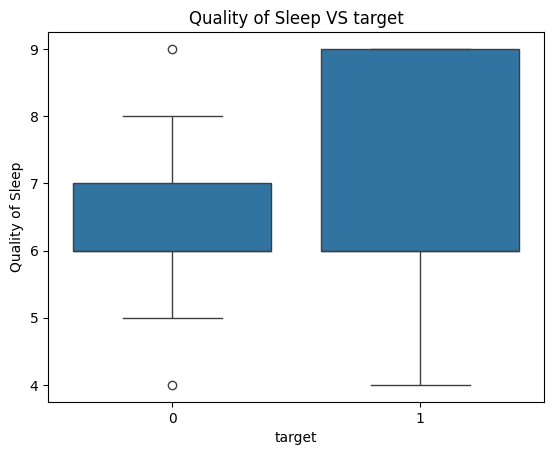

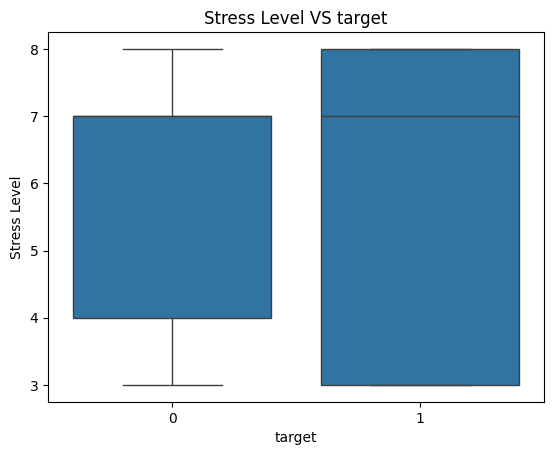

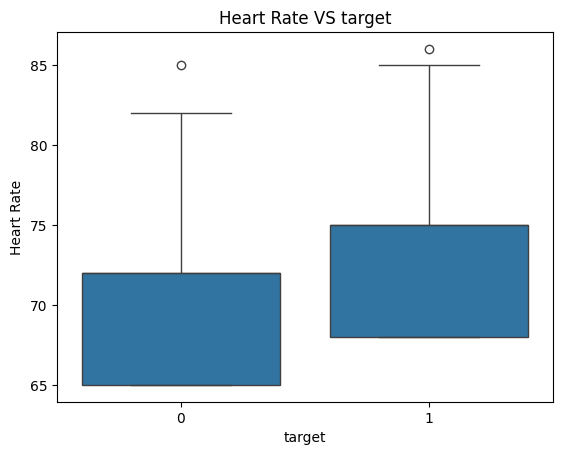

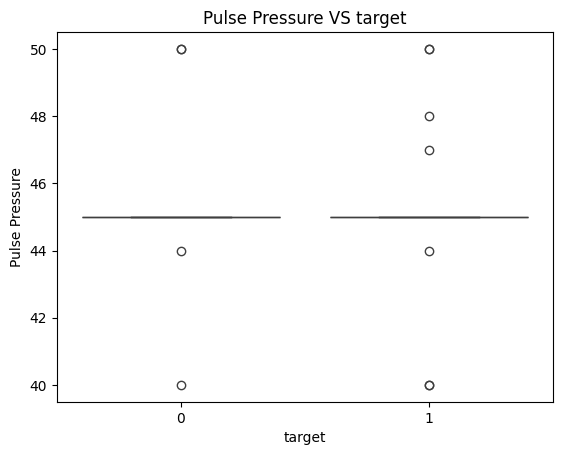

In [118]:
lista = ['Quality of Sleep', 'Stress Level', 'Heart Rate', 'Pulse Pressure']
for x in lista:
    plt.figure()
    sns.boxplot(data = train_set_2, x='target', y=x)
    plt.title(f'{x} VS target')

## La que peor se ve es la de 'Pulse Pressure', igualemnte probaremos con m√°s m√©todos voy a hacer un test de Mann-Whitney U con estas cuatro features

In [119]:
for x in lista:
    grupo_a = train_set_2.loc[train_set_2.target == 0][x]
    grupo_b = train_set_2.loc[train_set_2.target == 1][x]
    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)
    print('-',x,'-')
    print("Estad√≠stico U:", u_stat)
    print("Valor p:", p_valor)

    if p_valor < 0.05:
        print('Hay diferencia estad√≠sticamente significativa')
    else:
        print('No hay diferencia suficiente')
    print('------------------------------')

- Quality of Sleep -
Estad√≠stico U: 1619.0
Valor p: 0.1086575540433775
No hay diferencia suficiente
------------------------------
- Stress Level -
Estad√≠stico U: 1757.5
Valor p: 0.39833502689469147
No hay diferencia suficiente
------------------------------
- Heart Rate -
Estad√≠stico U: 1279.0
Valor p: 0.0010467736900188459
Hay diferencia estad√≠sticamente significativa
------------------------------
- Pulse Pressure -
Estad√≠stico U: 1893.5
Valor p: 0.7804599599627191
No hay diferencia suficiente
------------------------------


## Voy a hacer una lista sin estas features que no tienen diferencia suficiente y dejamos la de heart rate que rechazamos la hip√≥tesis nula y tenemos confianza de que si hay relaci√≥n

In [120]:
numericas_test_u_stats = [x for x in numericas if x not in ['Quality of Sleep', 'Stress Level', 'Pulse Pressure']]
features_u_stat = categoricas_int + numericas_test_u_stats

## Tambien voy a probar otros m√©todos de selecci√≥n de features

In [121]:
# SelectFromModel
r_forest = RandomForestClassifier(random_state = 42)

selector_model = SelectFromModel(estimator= r_forest, threshold='median')
selector_model.fit(X_train_2, y_train_2)
select_from_model_2 = selector_model.get_feature_names_out().tolist()

In [122]:
# SFS
sfs = SequentialFeatureSelector(r_forest, scoring = 'precision')
sfs.fit(X_train_2, y_train_2)
SFS_2 = sfs.get_feature_names_out().tolist()

In [123]:
# hard-voting

features_hard_voting_2 = select_from_model_2 + RFE + SFS_2
votos_2 = Counter(features_hard_voting_2)
seleccion_2 = [x for x,y in votos_2.most_common(10)]

In [124]:
# Feature importance

r_forest.fit(X_train_2, y_train_2)

importances_2 = r_forest.feature_importances_
feature_names_2 = X_train_2.columns

features_importance_2 = pd.Series(importances_2, index=X_train_2.columns).sort_values(ascending=False)

## Filtramos para quitar ruido

In [125]:
feature_importance_2 = [x for x,y in features_importance_2.items() if y >= 0.01]

## Voy a preparar todo para probar con diferentes features y diferentes modelos con validaci√≥n cruzada

## Comparaci√≥n de Modelos

Como anteriormente, con un bucle prob√© diferentes modelo (baseline):

* `RandomForestClassifier`
* `XGBClassifier`
* `LGBMClassifier`
* `GradientBoostingClassifier`
* `CatBoostClassifier`
* `DecisionTreeClassifier`
* `LogisticRegression`
* `KNeighborsClassifier`
* `SVC`

Todos fueron evaluados mediante **validaci√≥n cruzada** con el scoring:
**`precision`**.

Compar√© los resultados entre ellos mismos, seleccion√© los modelos con mejor rendimiento e hice pruebas, ajust√© hiperpar√°metros a cada modelo. La elecci√≥n final del mejor modelo fue en base a obtener:

* **`classification_report`**
* **Importancia de variables (`feature_importances_`)**
* **`ConfusionMatrixDisplay`**

Viendo esto, me pude asegurar que lo que estaba eligiendo estaba funcionando bien para el problema a solucionar.

## Quito 'Manager' por el problema que vimos al inicio

In [126]:
features_u_stat = [x for x in features_u_stat if x != 'Manager']

In [127]:
dict_features = {
    'todas': todas,
    'u_stat': features_u_stat,
    'SFM' : select_from_model_2,
    'RFE' : RFE,
    'SFS' : SFS_2,
    'hard voting':seleccion_2,
    'feature import':feature_importance_2
}

## En esta ocasi√≥n no voy a usar categoricas de tipo 'category' para 'cat boost' y 'light gbm'

In [128]:
#Instanciamos los modelos
rforest = RandomForestClassifier(random_state= 42)
xgb = XGBClassifier(verbosity = 0, random_state= 42)
lgb = LGBMClassifier(verbose = -1, random_state= 42)
gradient = GradientBoostingClassifier(random_state= 42)
cat= CatBoostClassifier(verbose = False, random_state= 42)
tree = DecisionTreeClassifier(random_state= 42)
linear = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()

#instanciamos el escalador para los modelos sensibles a la escala
scaler = StandardScaler()

# creamos un diccionario con todos los modelos
modelos = {
    'random forest' : rforest,
    'xgboost' : xgb,
    'light gbm' : lgb,
    'gradient' : gradient,
    'cat':cat,
    'tree':tree,
    'linear':linear,
    'knn': knn,
    'svc': svc
}


# vamos a hacer un bucle que depende del modelo se har√°n unas cosas u otras y todo se guarda en un diccionario para visualizarlo en un dataframe
resultados_2 = []
for nombre, modelo in modelos.items():
    if nombre in ['linear','knn', 'svc']:
        for clave, valor in dict_features.items():
            X_train_escalado = scaler.fit_transform(X_train_2[valor])
            cross = cross_validate(modelo, X_train_escalado, y_train_2, cv = 5 , scoring = ['precision'])
            resultados_2.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'precision' : np.mean(cross['test_precision'])
            })           
    else:
        for clave, valor in dict_features.items():
            cross = cross_validate(modelo, train_set_2[valor], y_train_2, cv = 5 , scoring = ['precision'])
            resultados_2.append({
                'modelo': nombre,
                'metodo seleccion features' : clave,
                'precision' : np.mean(cross['test_precision'])
            }) 

In [129]:
resultados_baseline_2 = pd.DataFrame(resultados_2).sort_values(by='precision', ascending=False)

In [130]:
pd.set_option('display.max_rows', None)

In [131]:
resultados_baseline_2

modelo metodo seleccion features  precision
11        xgboost                       SFS   0.949231
18      light gbm                       SFS   0.949231
53            knn                       SFS   0.949231
25       gradient                       SFS   0.935897
46         linear                       SFS   0.935897
32            cat                       SFS   0.935897
4   random forest                       SFS   0.935897
39           tree                       SFS   0.935897
60            svc                       SFS   0.935897
49            knn                     todas   0.932867
50            knn                    u_stat   0.932867
55            knn            feature import   0.930000
51            knn                       SFM   0.930000
52            knn                       RFE   0.926667
42         linear                     todas   0.917716
54            knn               hard voting   0.914615
62            svc            feature import   0.913333
59            svc                       RFE   0.913333
57            svc                    u_stat   0.910989
58            svc                       SFM   0.905792
61            svc               hard voting   0.905792
43         linear                    u_stat   0.904895
44         linear                       SFM   0.896970
45         linear                       RFE   0.896970
47         linear               hard voting   0.896970
35           tree                     todas   0.888782
29            cat                    u_stat   0.888462
19      light gbm               hard voting   0.888462
28            cat                     todas   0.888462
0   random forest                     todas   0.888462
1   random forest                    u_stat   0.888462
34            cat            feature import   0.887179
56            svc                     todas   0.885128
24       gradient                       RFE   0.883846
3   random forest                       RFE   0.883333
31            cat                       RFE   0.880000
33            cat               hard voting   0.879638
30            cat                       SFM   0.879638
2   random forest                       SFM   0.874510
38           tree                       RFE   0.874044
13        xgboost            feature import   0.873077
7         xgboost                     todas   0.873077
8         xgboost                    u_stat   0.873077
23       gradient                       SFM   0.870833
26       gradient               hard voting   0.870833
10        xgboost                       RFE   0.869744
17      light gbm                       RFE   0.868462
21       gradient                     todas   0.866946
5   random forest               hard voting   0.865152
6   random forest            feature import   0.865152
22       gradient                    u_stat   0.865128
36           tree                    u_stat   0.862775
9         xgboost                       SFM   0.860989
12        xgboost               hard voting   0.860989
41           tree            feature import   0.860407
48         linear            feature import   0.857377
14      light gbm                     todas   0.855275
15      light gbm                    u_stat   0.855275
20      light gbm            feature import   0.855275
16      light gbm                       SFM   0.855275
27       gradient            feature import   0.852652
37           tree                       SFM   0.848319
40           tree               hard voting   0.840476

In [132]:
pd.reset_option('display.max_rows', None)

## Vamos a hacer validaci√≥n cruzada para ver los resultados

## Para el modelo, usaremos las features que tienen diferencia estad√≠sticamente significativa de RFE

In [133]:
variables = ['Gender_code', 'Nurse', 'Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'systolic', 'diastolic']

In [134]:
#Instanciamos los modelos
xgb = XGBClassifier(verbosity = 0, random_state= 42)

In [135]:
cross = cross_validate(xgb, train_set_2[variables], y_train_2, cv = 5 , scoring = ['precision'])
print(f"precision {np.mean(cross['test_precision']):.4f}")

precision 0.8571


## El modelo XGB da buenos resultados para precision

In [136]:

## Aqu√≠ iria el proceso de pruebas con los mejores modelos y diferentes features, vamos directos al que funciona y he usado


## Al modelo le vamos a pasar unos hiperpar√°metros y un GridSearchCV

In [137]:
xgb2_ = XGBClassifier(eval_metric='logloss', random_state=42)
param_grid_xgb2_ = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2,0.3],
    'max_depth': [2,3,4, 5],
    'subsample': [0.7,0.8, 0.9],
    'colsample_bytree': [0.6,0.7,0.8, 1]
}

grid_xgb2_ = GridSearchCV(xgb2_, param_grid_xgb2_, cv=5, scoring='precision', n_jobs=-1, verbose=1)
grid_xgb2_.fit(train_set_2[variables], y_train_2)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='precision', verbose=1)

In [138]:
y_pred2_2 = grid_xgb2_.best_estimator_.predict(test_set_2[variables])
print(classification_report(y_test_2, y_pred2_2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [139]:
mejores_parametros_xgb = grid_xgb2_.best_params_

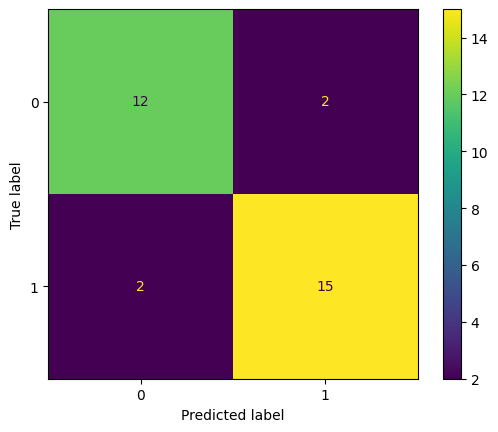

In [140]:
ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred2_2);

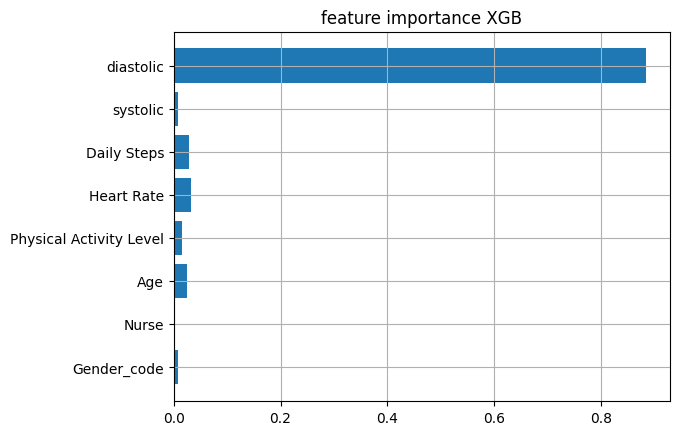

In [141]:
xgb2_.fit(train_set_2[variables], y_train_2)
plt.barh(train_set_2[variables].columns,xgb2_.feature_importances_)
plt.title('feature importance XGB')
plt.grid(True);

## Si que la columna 'diastolic' es muy dominante, eso es que esa columna es muy predictora, cuando quit√© estas columnas, el modelo di√≥ unos resultados un poquito por debajo, pero resultados muy buenos tambi√©n, como el modelo pasa por validacion cruzada cuando hacemos el gridSearch, nos indica que no hace overfiting porque los resultados se ven estables, tiene sentido desde un punto cl√≠nico porque la presi√≥n arterial va relacionada con la apnea del sue√±o

# Ahora voy a hacer un Pipeline para la transformaci√≥n de datos para la producci√≥n y guardar el modelo y el pipeline, necesito cargar los datos y hacer las mismas transformaciones

In [142]:
data = pd.read_csv('./src/data/Sleep_Health_and_Lifestyle.csv')

In [143]:
data.drop(columns = ['Person ID', 'BMI Category'], inplace = True)
data.dropna(inplace=True)
data.rename(columns = {'Sleep Disorder':'target'}, inplace = True)
data['target'] = data['target'].map({'Insomnia':0, 'Sleep Apnea':1})
data[['systolic','diastolic']] = data['Blood Pressure'].str.extract(r'(\d+)/(\d+)', expand=True)
data.drop(columns='Blood Pressure', inplace=True)
data['systolic'] = data['systolic'].astype(int)
data['diastolic'] = data['diastolic'].astype(int)
data['Gender_code'] = data['Gender'].apply(lambda x: 0 if x == 'Male' else 1)
dummies_train_2 = pd.get_dummies(data['Occupation']).astype(int)
data = pd.concat([data, dummies_train_2], axis = 1)

## Despu√©s de hacer las transformaciones como anteriormente, vamos a construir unas funciones para pipeline

In [144]:
def gender_func(X):
    X = X.copy()
    X['Gender_code'] = (X == 'Femenino').astype(int)
    return X[['Gender_code']]

## Vamos a hacer el pipeline

In [145]:
gender = FunctionTransformer(gender_func)
nurse = FunctionTransformer(nurse_func)

# metemos todo en el columntransformer para que se hagan los cambios
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('gender', gender, ['Gender']),
        ('nurse', nurse, ['Nurse'])
    ],
    remainder='passthrough' 
)
# el remainder se pone en 'passthrough' para que no afecte al resto de columnas

# este es el pipeline con todo dentro
pipeline2 = Pipeline([
    ('preprocessor', preprocessor_2)
])

## Creo un dataset simulando la entrada de los datos del cliente para hacer el fit del pipeline

In [146]:
X_t_2 = data[variables]
y_t_2 = data['target']

In [147]:
pipe_2 = pd.DataFrame({
                'Gender': 'Masculino',
                'Nurse':'S√≠',
                'Age':27,
                'Physical Activity Level': 42,
                'Heart Rate':77,
                'Daily Steps':4200,
                'systolic':126,
                'diastolic':83
}, index = X_t_2.index)

In [148]:
pipe_2 = pipe_2.iloc[[0]]

In [149]:
pipeline2.fit(pipe_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  FunctionTransformer(func=<function gender_func at 0x0000013DF39A6A70>),
                                                  ['Gender']),
                                                 ('nurse',
                                                  FunctionTransformer(func=<function nurse_func at 0x0000013DEDCDAB00>),
                                                  ['Nurse'])]))])

# Hacemos un fit del modelo XGB tambi√©n para poder guardarlo, en este caso no lo pongo dentro del pipeline, ir√° fuera

In [150]:
model = XGBClassifier(eval_metric='logloss', random_state=42, **mejores_parametros_xgb)

In [151]:
model.fit(X_t_2, y_t_2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### Construcci√≥n del Pipeline

Durante la construcci√≥n del pipeline especialmente para la transformaci√≥n de datos, realiz√© diferentes pruebas y ajustes para asegurarme el buen funcionamiento en cada proceso para conseguir un flujo perfecto y robusto.

## Guardamos el modelo y el pipeline con joblib

In [155]:
joblib.dump(model, './src/models/modelo_entrenado_2_XGB.joblib')

['./src/models/modelo_entrenado_2_XGB.joblib']

In [153]:
joblib.dump(pipeline2, './src/models/pipeline_transformacion_2_XGB.joblib')

['./src/models/pipeline_transformacion_2_XGB.joblib']

# üîó ¬°Prueba la aplicaci√≥n!

Puedes probar el model y hacer un test sobre t√∫ **calidad del sue√±o**, pedir informaci√≥n desde d√≥nde hacer un estudio del sue√±o, una cl√≠nica para trabajar en un mejor sue√±o y enviartelo por mail para tener un acceso r√°pido en la app desarrollada con Streamlit. Solo tienes que introducir tus datos y obtendr√°s la predicci√≥n personalizada, adem√°s de recomendaciones √∫tiles.

üëâ [Haz clic aqu√≠ para acceder a la aplicaci√≥n](https://health-and-sleep-relation.streamlit.app/)

